# Installation of the packages

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


# Importation of the required modules

In [3]:
import numpy as np
import pandas as pd
import datetime as dt
import csv
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


# Description of the dataset

Data obtained from https://ieee-dataport.org/open-access/seer-breast-cancer-data

This dataset of breast cancer patients was obtained from the **2017 November update** of the SEER Program of the NCI, which provides information on population-based cancer statistics. 

The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) **diagnosed in 2006-2010.**

Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

The columns in the dataset provide details about the patients' demographics, cancer stage, tumor characteristics, lymph node examination results, hormone receptor status, survival months and survival status.

Key features:

**PATIENT DEMOGRAPHIC VARIABLES**

**Age:** Age of the patient.

**Race:** Ethnicity of the patient.

**Marital Status:** Marital status at diagnosis.


**CANCER STAGE**

**T Stage:** Tumor size classification.

**N Stage:** Regional lymph node involvement.

**6th Stage:** Overall cancer stage based on the 6th edition of the AJCC Cancer Staging Manual.

**TUMOUR CHARACTERISTICS**
**Grade ** Aggressiveness of cancer/how cells differe from the normal breast tissue cell

**A Stage:** Anatomical stage of cancer.

**Tumor Size:** Size of the tumor.
 
**HORMONAL STATUS**

**Estrogen Status:** Estrogen receptor status (positive or negative).

**Progesterone Status:** Progesterone receptor status (positive or negative).


**LYMPH NODE EXAMINATION**

**Regional Node Examined:** Number of lymph nodes examined.

**Regional Node Positive:** Number of lymph nodes that tested positive.


**PATIENT OUTCOME VARIABLES**

**Survival Months:** Number of months the patient survived.

**Status:** Whether the patient was alive or dead at the time of follow-up.

# Reading of the dataset from a CSV file

In [4]:
raw_breast_cancer_data_2006_2010 = pd.read_csv('/Users/h.nderitu/PyData/Capstone Project/SEER Breast Cancer Dataset .csv')
print(raw_breast_cancer_data_2006_2010)

      Age                                              Race   \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status  Unnamed: 3 T Stage  N Stage 6th Stage  \
0     Married (including common law)         NaN       T2      N3      IIIC   
1     Married (including common law)         NaN       T2      N2      II

In [5]:
raw_breast_cancer_data_2006_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

In [6]:
# rename the columns to terms that are more meaningful
raw_breast_cancer_data_2006_2010.rename(columns = {'Race ':'Race',
                                                   'T Stage ':'T_stage',
                                                   'N Stage':'N_stage',
                                                   '6th Stage':'6th_stage',
                                                   'A Stage':'A_stage', 
                                                   'Reginol Node Positive': 'Regional Node Positive'}, 
                                                   inplace = True)

In [7]:
# Check names of columns
raw_breast_cancer_data_2006_2010.columns

Index(['Age', 'Race', 'Marital Status', 'Unnamed: 3', 'T_stage', 'N_stage',
       '6th_stage', 'Grade', 'A_stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [8]:
# Remove column index 3 called Unnamed: 3 from the data as it has missing values for all rows.
breast_cancer_data_2006_2010 = raw_breast_cancer_data_2006_2010.drop(columns=['Unnamed: 3'], axis = 1)
print(breast_cancer_data_2006_2010)

      Age                                               Race  \
0      43  Other (American Indian/AK Native, Asian/Pacifi...   
1      47  Other (American Indian/AK Native, Asian/Pacifi...   
2      67                                              White   
3      46                                              White   
4      63                                              White   
...   ...                                                ...   
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status T_stage N_stage 6th_stage  \
0     Married (including common law)      T2      N3      IIIC   
1     Married (including common law)      T2      N2      IIIA   
2     Married (including common l

In [87]:
breast_cancer_data_2006_2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T_stage                 4024 non-null   object
 4   N_stage                 4024 non-null   object
 5   6th_stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Regional Node Positive  4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

In [88]:
# Check top 5 rows of data
breast_cancer_data_2006_2010.head()

Age                                               Race  \
0   43  Other (American Indian/AK Native, Asian/Pacifi...   
1   47  Other (American Indian/AK Native, Asian/Pacifi...   
2   67                                              White   
3   46                                              White   
4   63                                              White   

                   Marital Status T_stage N_stage 6th_stage  \
0  Married (including common law)      T2      N3      IIIC   
1  Married (including common law)      T2      N2      IIIA   
2  Married (including common law)      T2      N1       IIB   
3                        Divorced      T1      N1       IIA   
4  Married (including common law)      T2      N2      IIIA   

                                 Grade   A_stage  Tumor Size Estrogen Status  \
0  Moderately differentiated; Grade II  Regional          40        Positive   
1  Moderately differentiated; Grade II  Regional          45        Positive   
2     Poorly differentiated; Grade III  Regional          25        Positive   
3  Moderately differentiated; Grade II  Regional          19        Positive   
4  Moderately differentiated; Grade II  Regional          35        Positive   

  Progesterone Status  Regional Node Examined  Regional Node Positive  \
0            Positive                      19                      11   
1            Positive                      25                       9   
2            Positive                       4                       1   
3            Positive                      26                       1   
4            Positive                      21                       5   

   Survival Months Status  
0                1  Alive  
1                2  Alive  
2                2   Dead  
3                2   Dead  
4                3   Dead

In [89]:
# Check bottom 5 rows of data
breast_cancer_data_2006_2010.tail()

Age                                               Race  \
4019   52                                              White   
4020   53                                              White   
4021   53                                              White   
4022   60  Other (American Indian/AK Native, Asian/Pacifi...   
4023   62                                              White   

                      Marital Status T_stage N_stage 6th_stage  \
4019  Married (including common law)      T1      N1       IIA   
4020  Married (including common law)      T1      N2      IIIA   
4021                        Divorced      T1      N1       IIA   
4022  Married (including common law)      T1      N1       IIA   
4023                        Divorced      T1      N1       IIA   

                                    Grade   A_stage  Tumor Size  \
4019         Well differentiated; Grade I  Regional          10   
4020     Poorly differentiated; Grade III  Regional           9   
4021  Moderately differentiated; Grade II  Regional           9   
4022  Moderately differentiated; Grade II  Regional           9   
4023  Moderately differentiated; Grade II  Regional           8   

     Estrogen Status Progesterone Status  Regional Node Examined  \
4019        Positive            Positive                      19   
4020        Negative            Negative                      13   
4021        Negative            Negative                       4   
4022        Positive            Positive                      14   
4023        Positive            Positive                       1   

      Regional Node Positive  Survival Months Status  
4019                       1              107  Alive  
4020                       5              107  Alive  
4021                       2              107  Alive  
4022                       2              107  Alive  
4023                       1              107  Alive

**The data is for patients diagnosed with breast cancer between the years 2006 until 2010. The patients were followed up until November 2017 when the data was updated and extracted. A follow up of a minimum of 7 years and 11 months and a maximum of 11 years and 11 months.** 

# A. Univariate analysis of All variables/columns

## **1. Numerical variables**

Numerical variables:
- Age
- Tumor Size
- Regional Node Examined
- Regional Node Positive
- Survival Months


In [90]:
# Create a data frame with the columns with numerical variables
breast_cancer_numerical_data = breast_cancer_data_2006_2010[['Age','Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months']]
print(breast_cancer_numerical_data)

      Age  Tumor Size  Regional Node Examined  Regional Node Positive  \
0      43          40                      19                      11   
1      47          45                      25                       9   
2      67          25                       4                       1   
3      46          19                      26                       1   
4      63          35                      21                       5   
...   ...         ...                     ...                     ...   
4019   52          10                      19                       1   
4020   53           9                      13                       5   
4021   53           9                       4                       2   
4022   60           9                      14                       2   
4023   62           8                       1                       1   

      Survival Months  
0                   1  
1                   2  
2                   2  
3                   2  
4  

In [14]:
# Get descriptive statistics of the numerical data
breast_cancer_numerical_data.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Regional Node Positive  Survival Months  
count             4024.000000      4024.000000  
mean                 4.158052        71.297962  
std                  5.109331        22.921430  
min                  1.000000         1.000000  
25%                  1.000000        56.000000  
50%                  2.000000        73.000000  
75%                  5.000000        90.000000  
max                 46.000000       107.000000

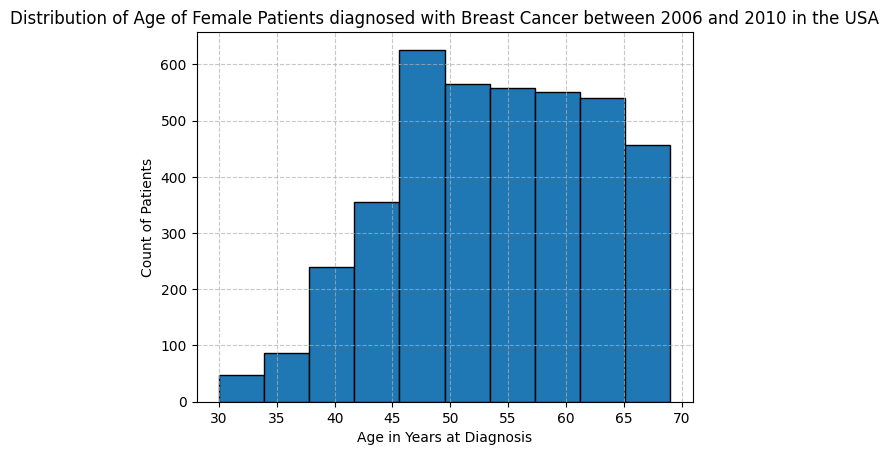

In [15]:
# visualize the data on age using a histogram
plt.hist(breast_cancer_numerical_data['Age'], edgecolor = 'black', bins = 10)
plt.title('Distribution of Age of Female Patients diagnosed with Breast Cancer between 2006 and 2010 in the USA')
plt.xlabel('Age in Years at Diagnosis')
plt.ylabel('Count of Patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


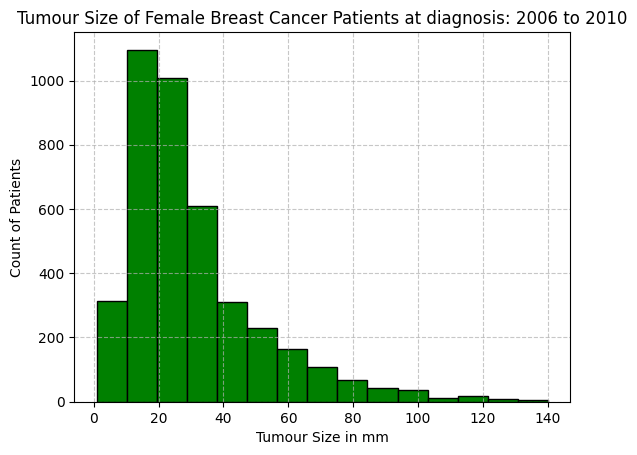

In [16]:
# visualize the data on tumor size using a histogram
plt.hist(breast_cancer_numerical_data['Tumor Size'], color = 'green', edgecolor = 'black', bins = 15)
plt.title('Tumour Size of Female Breast Cancer Patients at diagnosis: 2006 to 2010')
plt.xlabel('Tumour Size in mm')
plt.ylabel('Count of Patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

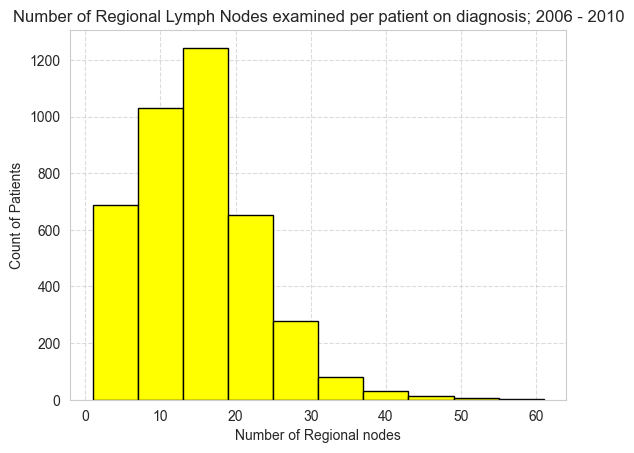

In [92]:
# visualize the data on the number of Regional lymph Nodes that were examined using a histogram
plt.hist(breast_cancer_numerical_data['Regional Node Examined'], color= 'yellow', edgecolor = 'black', bins = 10)
plt.title('Number of Regional Lymph Nodes examined per patient on diagnosis; 2006 - 2010')
plt.xlabel('Number of Regional nodes')
plt.ylabel('Count of Patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

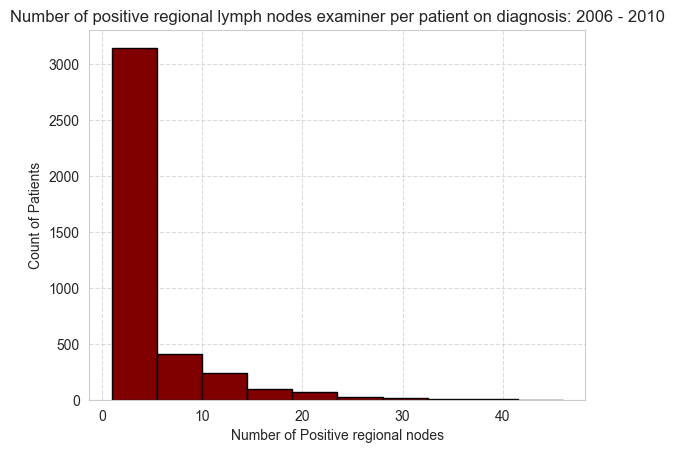

In [93]:
# visualize the data on the number of regional lymph nodes that were positive for cancer using a histogram
plt.hist(breast_cancer_numerical_data['Regional Node Positive'], color= 'maroon',edgecolor = 'black')
plt.title('Number of positive regional lymph nodes examiner per patient on diagnosis: 2006 - 2010')
plt.xlabel('Number of Positive regional nodes')
plt.ylabel('Count of Patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

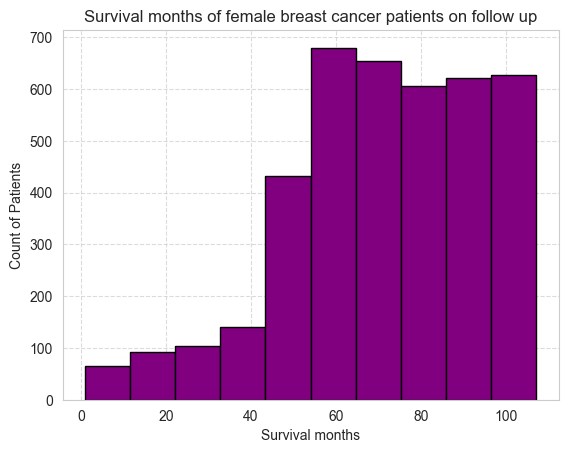

In [94]:
# visualize the data on the number of survival months using a histogram
plt.hist(breast_cancer_numerical_data['Survival Months'], color= 'purple',edgecolor = 'black', bins = 10)
plt.title('Survival months of female breast cancer patients on follow up')
plt.xlabel('Survival months')
plt.ylabel('Count of Patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **2. Categorical variables**

Categorical Variables
- Race
- Marital Status          
- T Stage                
- N_stage                 
- 6th_stage                         
- Grade                  
- A_stage               
- Estrogen Status         
- Progesterone Status
- Status

In [95]:
# get names of columns
breast_cancer_data_2006_2010.keys()

Index(['Age', 'Race', 'Marital Status', 'T_stage', 'N_stage', '6th_stage',
       'Grade', 'A_stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [96]:
# Determine the categories and value counts of the different categories of race
race_counts = breast_cancer_data_2006_2010['Race'].value_counts()
print(race_counts)

Race
White                                                        3413
Other (American Indian/AK Native, Asian/Pacific Islander)     320
Black                                                         291
Name: count, dtype: int64


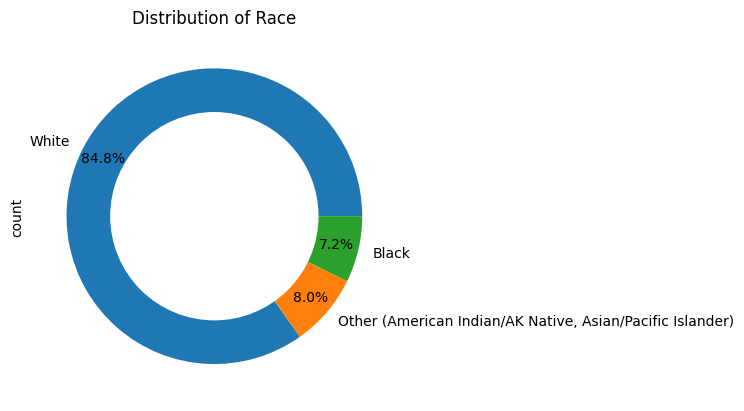

In [22]:
# visualization of race using a donut chart
race_counts.plot.pie(autopct='%1.1f%%', 
                     pctdistance=0.85)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Race')
plt.show()

In [97]:
# Determine the proportions of the different categories in percentage
race_percent = breast_cancer_data_2006_2010['Race'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(race_percent)

Race
White                                                        84.82%
Other (American Indian/AK Native, Asian/Pacific Islander)     7.95%
Black                                                         7.23%
Name: proportion, dtype: object


In [98]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = race_counts
percent = race_percent
race_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(race_freq_table)

                                                    count percentage
Race                                                                
White                                                3413     84.82%
Other (American Indian/AK Native, Asian/Pacific...    320      7.95%
Black                                                 291      7.23%


In [99]:
# Determine the categories and counts of the different categories
Marital_Status_counts = breast_cancer_data_2006_2010['Marital Status'].value_counts()
print(Marital_Status_counts)

Marital Status
Married (including common law)    2643
Single (never married)             615
Divorced                           486
Widowed                            235
Separated                           45
Name: count, dtype: int64


In [100]:
# Determine the proportions of the different categories in percentage
marital_status_percent = breast_cancer_data_2006_2010['Marital Status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(marital_status_percent)

Marital Status
Married (including common law)    65.68%
Single (never married)            15.28%
Divorced                          12.08%
Widowed                            5.84%
Separated                          1.12%
Name: proportion, dtype: object


In [101]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = Marital_Status_counts
percent = marital_status_percent
marital_status_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(marital_status_freq_table)

                                count percentage
Marital Status                                  
Married (including common law)   2643     65.68%
Single (never married)            615     15.28%
Divorced                          486     12.08%
Widowed                           235      5.84%
Separated                          45      1.12%


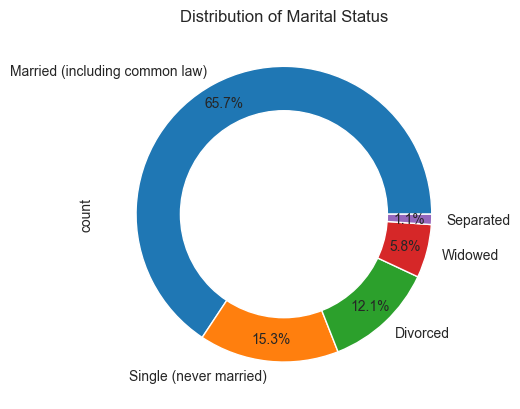

In [102]:
# visualization of marital status using a donut chart
marital_status_freq_table.plot.pie(y= 'count',
                     subplots= True,
                     autopct='%1.1f%%', 
                     pctdistance=0.85,
                     legend = False)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Marital Status')
plt.show()

In [108]:
# Determine the categories and counts of the different categories
T_stage_count = breast_cancer_data_2006_2010['T_stage'].value_counts()
print(T_stage_count)

T_stage
T2    1786
T1    1603
T3     533
T4     102
Name: count, dtype: int64


In [109]:
# Determine the proportions of the different categories in percentage
T_stage_percent = breast_cancer_data_2006_2010['T_stage'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(T_stage_percent)

T_stage
T2    44.38%
T1    39.84%
T3    13.25%
T4     2.53%
Name: proportion, dtype: object


In [110]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = T_stage_count
percent = T_stage_percent
t_stage_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(t_stage_freq_table)

         count percentage
T_stage                  
T2        1786     44.38%
T1        1603     39.84%
T3         533     13.25%
T4         102      2.53%


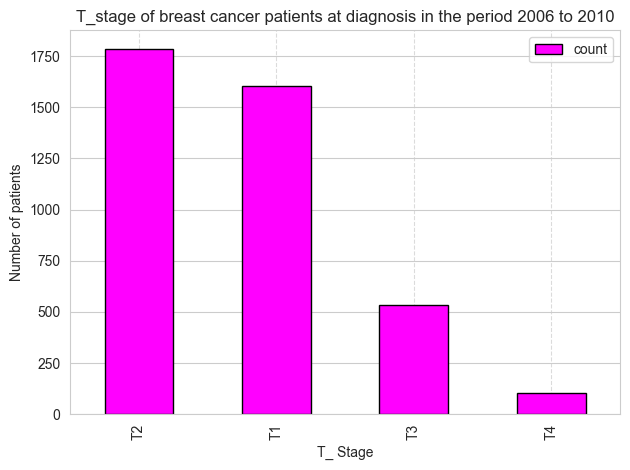

In [112]:
# visualization using a barchart
t_stage_freq_table.plot(kind = 'bar', color = 'magenta', edgecolor='black')
plt.title('T_stage of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.xlabel('T_ Stage')
plt.ylabel('Number of patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

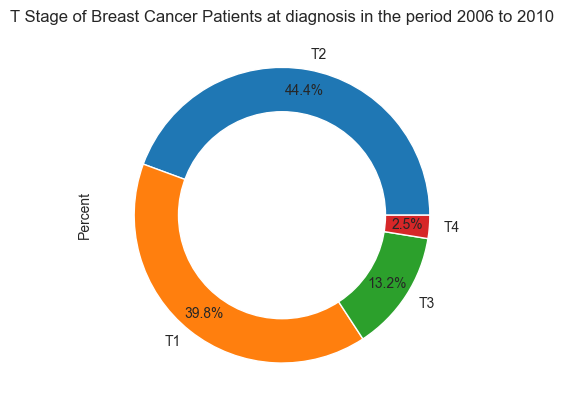

In [114]:
# visualization using a donut chart
T_stage_count.plot.pie(y= 'count',
                     subplots= True,
                     autopct='%1.1f%%', 
                     pctdistance=0.85,
                     legend = False)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('T Stage of Breast Cancer Patients at diagnosis in the period 2006 to 2010')
plt.ylabel('Percent')
plt.show()

In [103]:
# Determine the categories and counts of the different categories
N_stage_count = breast_cancer_data_2006_2010['N_stage'].value_counts()
print(N_stage_count)

N_stage
N1    2732
N2     820
N3     472
Name: count, dtype: int64


In [104]:
# Determine the proportions of the different categories in percentage
N_stage_percent = breast_cancer_data_2006_2010['N_stage'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(N_stage_percent)

N_stage
N1    67.89%
N2    20.38%
N3    11.73%
Name: proportion, dtype: object


In [105]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = N_stage_count
percent = N_stage_percent
N_stage_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(N_stage_freq_table)

         count percentage
N_stage                  
N1        2732     67.89%
N2         820     20.38%
N3         472     11.73%


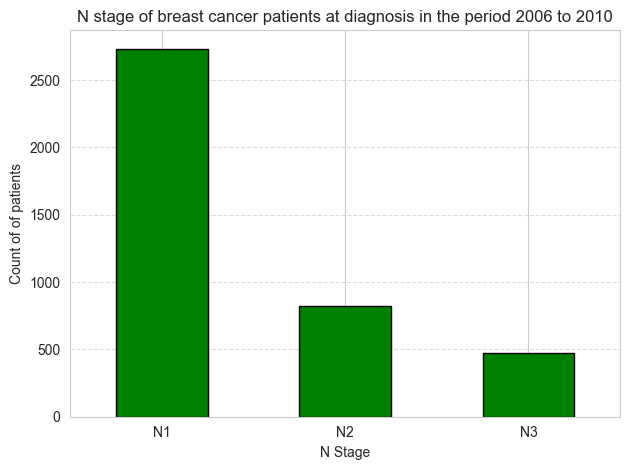

In [107]:
# visualization of N Stage using a donut chart
plots = N_stage_count.plot(y = 'N_stage', kind = 'bar', color = 'green', edgecolor = 'black', rot = 0, subplots= True,)
plt.title('N stage of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.xlabel('N Stage')
plt.ylabel('Count of of patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

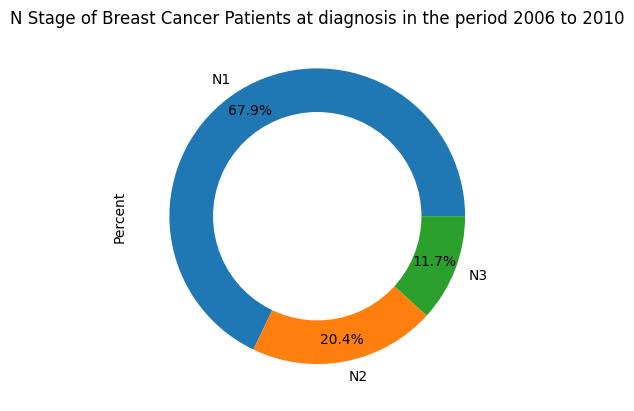

In [33]:
# visualization of marital status using a donut chart
N_stage_count.plot.pie(y= 'count',
                     subplots= True,
                     autopct='%1.1f%%', 
                     pctdistance=0.85,
                     legend = False)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('N Stage of Breast Cancer Patients at diagnosis in the period 2006 to 2010')
# place legend on the bottom right
plt.ylabel('Percent')
plt.show()

In [34]:
# Determine the categories and counts of the different categories
sixth_stage_count = breast_cancer_data_2006_2010['6th_stage'].value_counts()
print(sixth_stage_count)

6th_stage
IIA     1305
IIB     1130
IIIA    1050
IIIC     472
IIIB      67
Name: count, dtype: int64


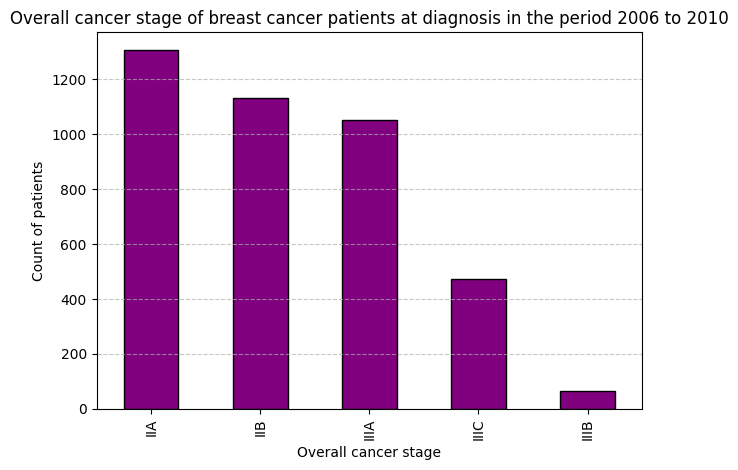

In [35]:
sixth_stage_count.plot(kind = 'bar', color = 'purple', edgecolor = 'black')
plt.title('Overall cancer stage of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.xlabel('Overall cancer stage')
plt.ylabel('Count of patients')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [36]:
# Determine the proportions of the different categories in percentage
sixth_stage_percent = breast_cancer_data_2006_2010['6th_stage'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(sixth_stage_percent)

6th_stage
IIA     32.43%
IIB     28.08%
IIIA    26.09%
IIIC    11.73%
IIIB     1.67%
Name: proportion, dtype: object


In [37]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = sixth_stage_count
percent = sixth_stage_percent
sixth_stage_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(sixth_stage_freq_table)

           count percentage
6th_stage                  
IIA         1305     32.43%
IIB         1130     28.08%
IIIA        1050     26.09%
IIIC         472     11.73%
IIIB          67      1.67%


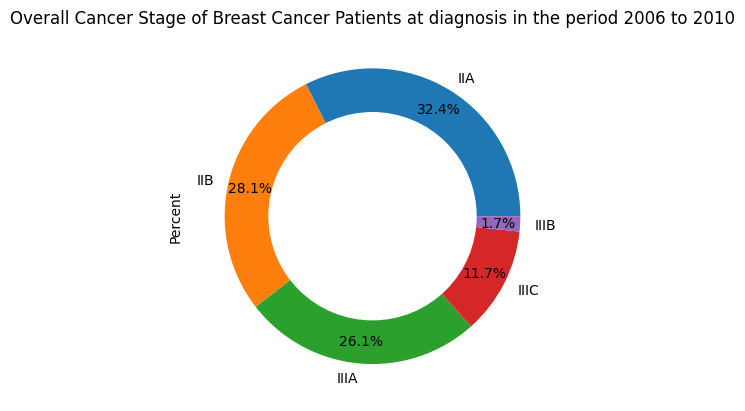

In [38]:
sixth_stage_count.plot.pie(y= 'count',
                     subplots= True,
                     autopct='%1.1f%%', 
                     pctdistance=0.85,
                     legend = False)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Overall Cancer Stage of Breast Cancer Patients at diagnosis in the period 2006 to 2010')
plt.ylabel('Percent')
plt.show()

In [39]:
# Determine the categories and counts of the different categories
grade_count = breast_cancer_data_2006_2010['Grade'].value_counts()
print(grade_count)

Grade
Moderately differentiated; Grade II       2351
Poorly differentiated; Grade III          1111
Well differentiated; Grade I               543
Undifferentiated; anaplastic; Grade IV      19
Name: count, dtype: int64


In [40]:
# Determine the proportions of the different categories in percentage
grade_percent = breast_cancer_data_2006_2010['Grade'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(grade_percent)

Grade
Moderately differentiated; Grade II       58.42%
Poorly differentiated; Grade III          27.61%
Well differentiated; Grade I              13.49%
Undifferentiated; anaplastic; Grade IV     0.47%
Name: proportion, dtype: object


In [41]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = grade_count
percent = grade_percent
grade_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(grade_freq_table)

                                        count percentage
Grade                                                   
Moderately differentiated; Grade II      2351     58.42%
Poorly differentiated; Grade III         1111     27.61%
Well differentiated; Grade I              543     13.49%
Undifferentiated; anaplastic; Grade IV     19      0.47%


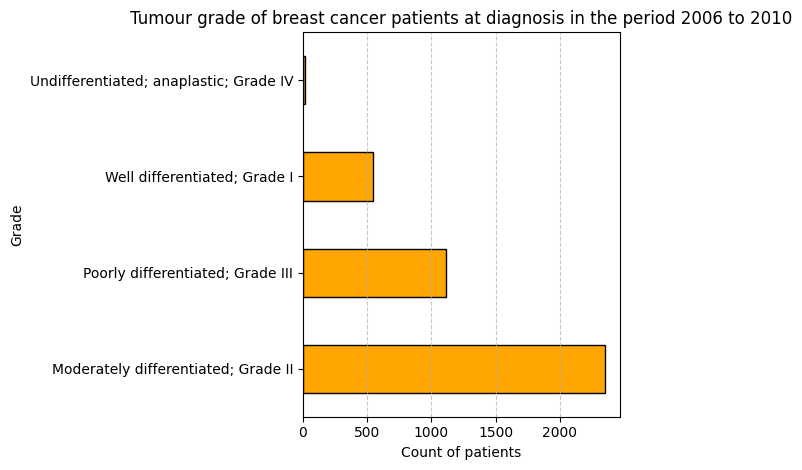

In [42]:
grade_count.plot(kind = 'barh', color = 'orange', edgecolor = 'black')
plt.title('Tumour grade of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.ylabel('Grade')
plt.xlabel('Count of patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

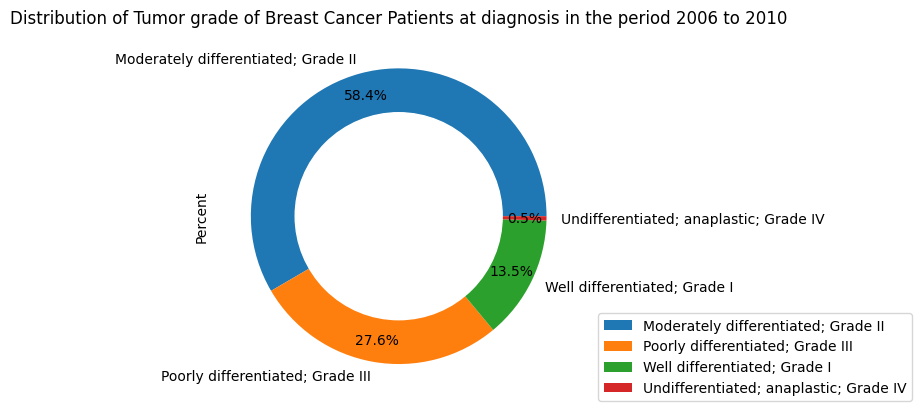

In [43]:
# visualization of marital status using a donut chart
grade_count.plot.pie(subplots= True,
                     autopct='%1.1f%%', 
                     pctdistance=0.85)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Distribution of Tumor grade of Breast Cancer Patients at diagnosis in the period 2006 to 2010')
# place legend on the bottom right
plt.legend(loc = (1.04,0))
plt.ylabel('Percent')
plt.show()

In [44]:
# Determine the categories and counts of the different categories
A_stage_count = breast_cancer_data_2006_2010['A_stage'].value_counts()
print(A_stage_count)

A_stage
Regional    3932
Distant       92
Name: count, dtype: int64


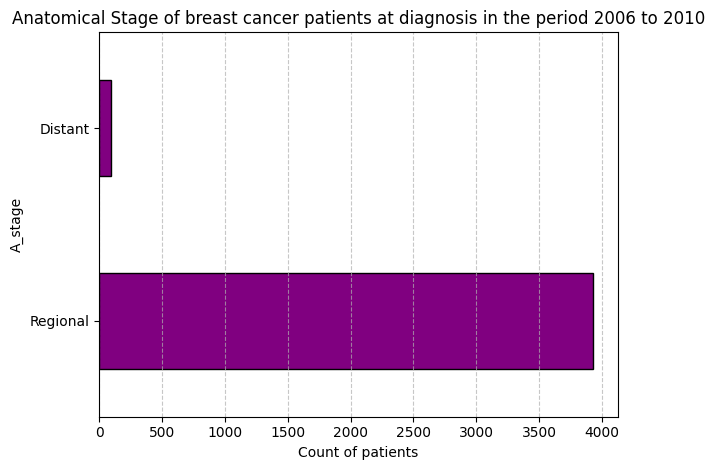

In [45]:
A_stage_count.plot(kind = 'barh', color = 'purple', edgecolor = 'black')
plt.title('Anatomical Stage of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.ylabel('A_stage')
plt.xlabel('Count of patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

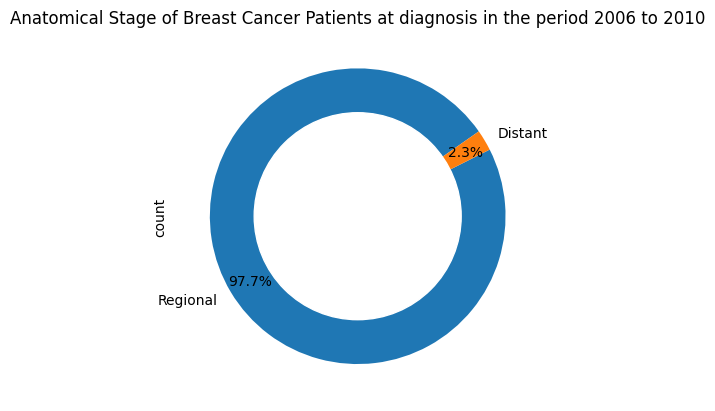

In [46]:
# visualization of marital status using a donut chart
A_stage_count.plot.pie(autopct='%1.1f%%',
                    pctdistance=0.85,
                    counterclock = True,
                    startangle = 35
                    )
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7,color='white')
plot =plt.gcf()
plot.gca().add_artist(my_circle)
plt.title('Anatomical Stage of Breast Cancer Patients at diagnosis in the period 2006 to 2010')
plt.show()

In [47]:
# Determine the proportions of the different categories in percentage
A_stage_percent = breast_cancer_data_2006_2010['A_stage'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(A_stage_percent)

A_stage
Regional    97.71%
Distant      2.29%
Name: proportion, dtype: object


In [48]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = A_stage_count
percent = A_stage_percent
A_stage_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(A_stage_freq_table)

          count percentage
A_stage                   
Regional   3932     97.71%
Distant      92      2.29%


In [49]:
# Determine the categories and counts of the different categories
estrogen_status_count = breast_cancer_data_2006_2010['Estrogen Status'].value_counts()
print(estrogen_status_count)

Estrogen Status
Positive    3755
Negative     269
Name: count, dtype: int64


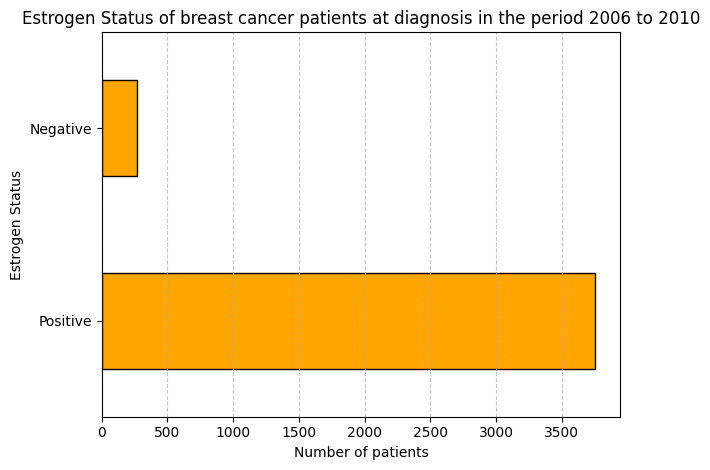

In [50]:
estrogen_status_count.plot(kind = 'barh', color = 'orange', edgecolor = 'black')
plt.title('Estrogen Status of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.ylabel('Estrogen Status')
plt.xlabel('Number of patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [51]:
# Determine the proportions of the different categories in percentage
estrogen_status_percent = breast_cancer_data_2006_2010['Estrogen Status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(estrogen_status_percent)

Estrogen Status
Positive    93.32%
Negative     6.68%
Name: proportion, dtype: object


In [52]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = estrogen_status_count
percent = estrogen_status_percent
estrogen_status_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(estrogen_status_freq_table)

                 count percentage
Estrogen Status                  
Positive          3755     93.32%
Negative           269      6.68%


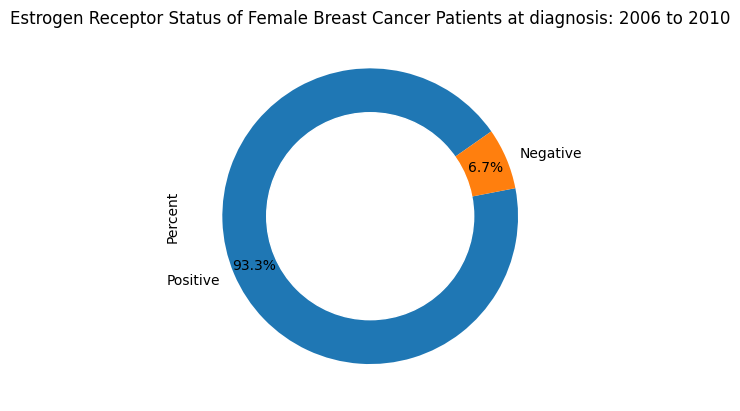

In [53]:
# visualization of estrogen receptor status using a donut chart
estrogen_status_count.plot.pie(subplots= True,
                    autopct='%1.1f%%', 
                    pctdistance=0.85,
                    counterclock = True,
                    startangle = 35)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Estrogen Receptor Status of Female Breast Cancer Patients at diagnosis: 2006 to 2010')
plt.ylabel('Percent')
plt.show()

In [54]:
# Determine the categories and counts of the different categories
progesterone_status_count = breast_cancer_data_2006_2010['Progesterone Status'].value_counts()
print(progesterone_status_count)

Progesterone Status
Positive    3326
Negative     698
Name: count, dtype: int64


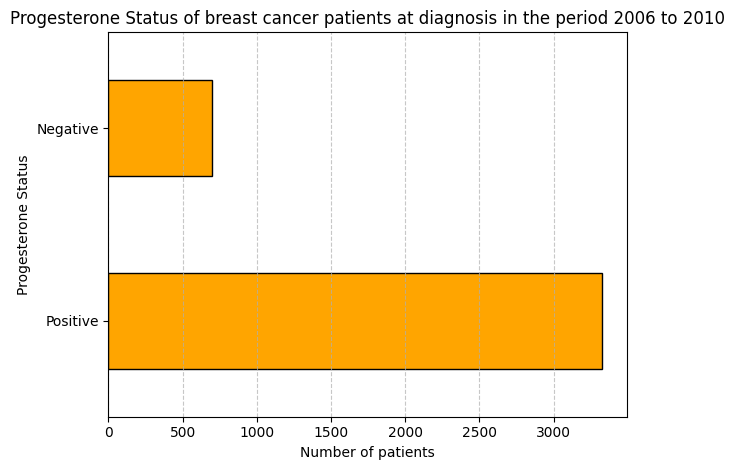

In [55]:
progesterone_status_count.plot(kind = 'barh', color = 'orange', edgecolor = 'black')
plt.title('Progesterone Status of breast cancer patients at diagnosis in the period 2006 to 2010')
plt.ylabel('Progesterone Status')
plt.xlabel('Number of patients')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [56]:
# Determine the proportions of the different categories in percentage
progesterone_status_percent = breast_cancer_data_2006_2010['Progesterone Status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(progesterone_status_percent)

Progesterone Status
Positive    82.65%
Negative    17.35%
Name: proportion, dtype: object


In [57]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = progesterone_status_count
percent = progesterone_status_percent
progesterone_status_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(progesterone_status_freq_table)

                     count percentage
Progesterone Status                  
Positive              3326     82.65%
Negative               698     17.35%


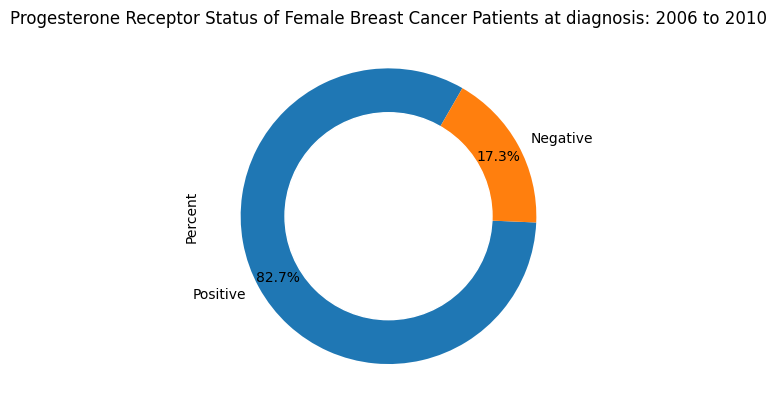

In [58]:
# visualization of progesterone status using a donut chart
progesterone_status_count.plot.pie(subplots= True,
                    autopct='%1.1f%%', 
                    pctdistance=0.85,
                    counterclock = True,
                    startangle = 60)
# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7,color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Progesterone Receptor Status of Female Breast Cancer Patients at diagnosis: 2006 to 2010')
plt.ylabel('Percent')
plt.show()

In [59]:
# Determine the categories and counts of the different categories
status_count = breast_cancer_data_2006_2010['Status'].value_counts()
print(status_count)

Status
Alive    3408
Dead      616
Name: count, dtype: int64


In [60]:
# Determine the proportions of the different categories in percentage
status_percent = breast_cancer_data_2006_2010['Status'].value_counts(normalize=True).mul(100).round(2).astype(str) + '%'
print(status_percent)

Status
Alive    84.69%
Dead     15.31%
Name: proportion, dtype: object


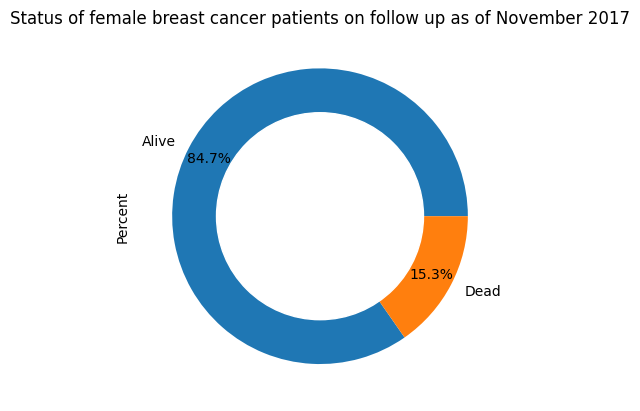

In [61]:
status_count.plot.pie(y= 'count',
                     subplots= True,
                     autopct='%1.1f%%', 
                     pctdistance=0.85)

# add a circle at the center to transform it to a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Status of female breast cancer patients on follow up as of November 2017')
plt.ylabel('Percent')
plt.show()

In [62]:
# Display the proportions and value counts in one data frame. Concatenate two data frames
counts = status_count
percent = status_percent
status_freq_table = pd.concat([counts,percent], axis=1, keys=['count','percentage'])
print(status_freq_table)

        count percentage
Status                  
Alive    3408     84.69%
Dead      616     15.31%


# B. Bivariate analysis of Patient Demographic Variables

Patient-Demographic Variables
- Age - numerical variable
- Race - categorical variable
- Marital Status - Categorical variable

In [68]:
# Check what insight is coming from analysing age and race variables
breast_cancer_data_2006_2010.groupby('Race')['Age'].describe()

count       mean  \
Race                                                                    
Black                                                291.0  52.580756   
Other (American Indian/AK Native, Asian/Pacific...   320.0  51.431250   
White                                               3413.0  54.329036   

                                                         std   min   25%  \
Race                                                                       
Black                                               9.049834  31.0  46.0   
Other (American Indian/AK Native, Asian/Pacific...  9.541279  30.0  44.0   
White                                               8.851774  30.0  48.0   

                                                     50%   75%   max  
Race                                                                  
Black                                               53.0  60.0  69.0  
Other (American Indian/AK Native, Asian/Pacific...  51.0  60.0  69.0  
White                                               55.0  62.0  69.0

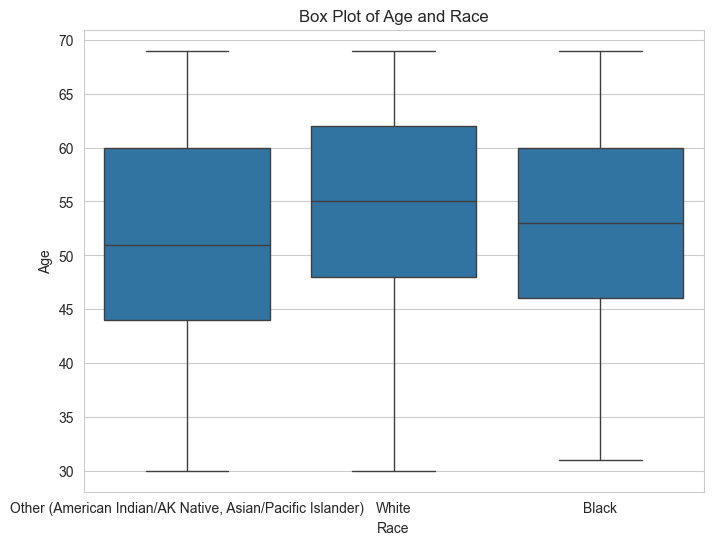

In [69]:
# visualisation of a boxplot using seaborn for comparison of Race and Age
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Race',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Race')
ax.set_ylabel('Age')
ax.set_title('Box Plot of Age and Race')
plt.show()

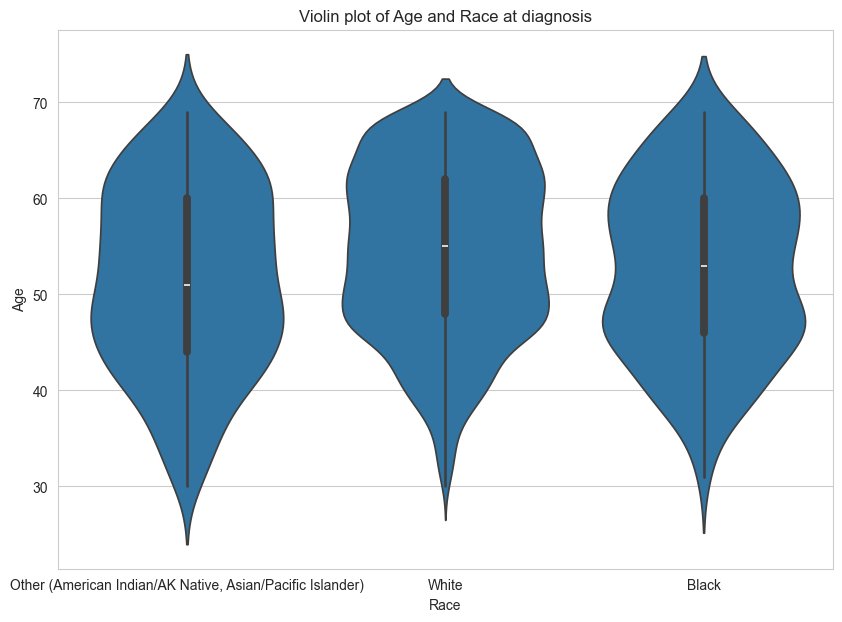

In [70]:
# Visualization of comparison of age and race at diagnosis of breast cancer
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Race', 
    y='Age')
plt.title('Violin plot of Age and Race at diagnosis')
plt.show()

In [71]:
# Check what insight is coming from analysing age and marital status variables
breast_cancer_data_2006_2010.groupby('Marital Status')['Age'].describe()

count       mean       std   min   25%   50%  \
Marital Status                                                                  
Divorced                         486.0  55.131687  8.342609  30.0  49.0  56.0   
Married (including common law)  2643.0  53.639803  8.843519  30.0  47.0  54.0   
Separated                         45.0  51.533333  7.881509  37.0  46.0  53.0   
Single (never married)           615.0  51.778862  9.169764  30.0  46.0  51.0   
Widowed                          235.0  61.519149  6.825250  37.0  58.0  63.0   

                                 75%   max  
Marital Status                              
Divorced                        61.0  69.0  
Married (including common law)  61.0  69.0  
Separated                       57.0  67.0  
Single (never married)          59.0  69.0  
Widowed                         67.0  69.0

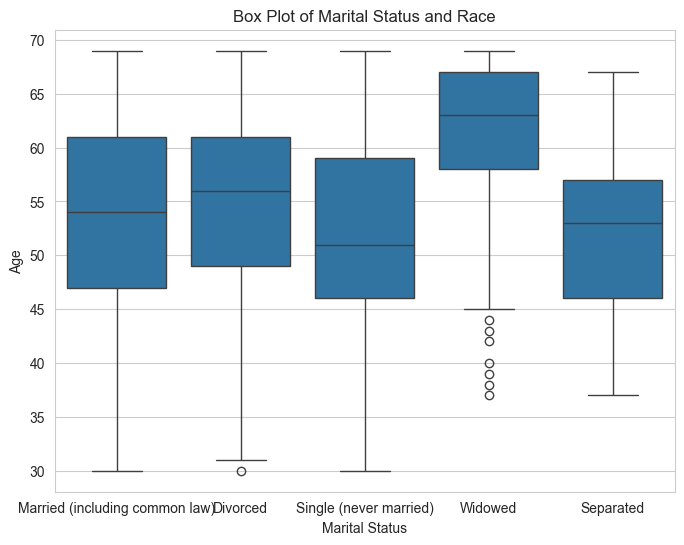

In [72]:
# visualisation of a boxplot using seaborn for comparison of Race and Age
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Marital Status',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Marital Status')
ax.set_ylabel('Age')
ax.set_title('Box Plot of Marital Status and Race')
plt.show()

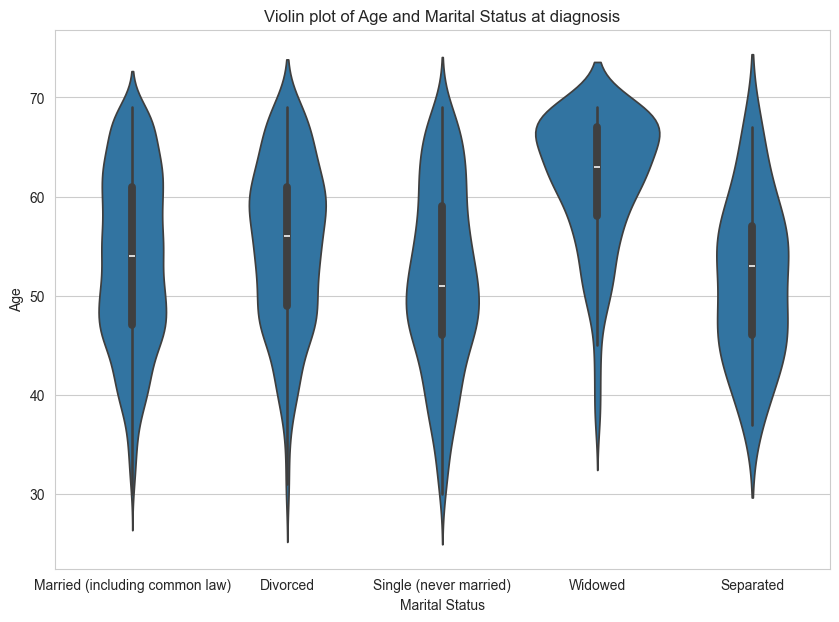

In [73]:
# Visualization of comparison of age and marital status at diagnosis of breast cancer
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Marital Status', 
    y='Age')
plt.title('Violin plot of Age and Marital Status at diagnosis')
plt.show()

Race                            Black  \
Marital Status                          
Divorced                           40   
Married (including common law)    113   
Separated                           8   
Single (never married)            102   
Widowed                            28   

Race                            Other (American Indian/AK Native, Asian/Pacific Islander)  \
Marital Status                                                                              
Divorced                                                                       29           
Married (including common law)                                                237           
Separated                                                                       4           
Single (never married)                                                         33           
Widowed                                                                        17           

Race                            White  
Marital Status      

Text(0, 0.5, 'Race')

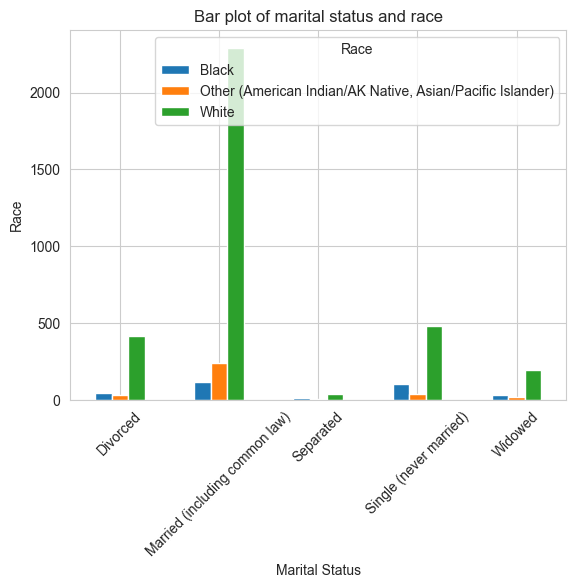

In [74]:
# Compare the marital status of the patients and the age of the patient at diagnosis
marital_Race_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['Race'])
print(marital_Race_ctab)
barplot = marital_Race_ctab.plot.bar(rot=45)
plt.title('Bar plot of marital status and race')
plt.xlabel('Marital Status')
plt.ylabel('Race')

In [75]:
# Check what insight is coming from analysing age and race variables
breast_cancer_data_2006_2010.groupby(['Race','Marital Status'])['Age'].describe()

count  \
Race                                               Marital Status                           
Black                                              Divorced                          40.0   
                                                   Married (including common law)   113.0   
                                                   Separated                          8.0   
                                                   Single (never married)           102.0   
                                                   Widowed                           28.0   
Other (American Indian/AK Native, Asian/Pacific... Divorced                          29.0   
                                                   Married (including common law)   237.0   
                                                   Separated                          4.0   
                                                   Single (never married)            33.0   
                                                   Widowed                           17.0   
White                                              Divorced                         417.0   
                                                   Married (including common law)  2293.0   
                                                   Separated                         33.0   
                                                   Single (never married)           480.0   
                                                   Widowed                          190.0   

                                                                                        mean  \
Race                                               Marital Status                              
Black                                              Divorced                        54.325000   
                                                   Married (including common law)  52.292035   
                                                   Separated                       51.625000   
                                                   Single (never married)          49.764706   
                                                   Widowed                         61.785714   
Other (American Indian/AK Native, Asian/Pacific... Divorced                        52.448276   
                                                   Married (including common law)  50.864979   
                                                   Separated                       44.500000   
                                                   Single (never married)          49.272727   
                                                   Widowed                         63.411765   
White                                              Divorced                        55.395683   
                                                   Married (including common law)  53.993022   
                                                   Separated                       52.363636   
                                                   Single (never married)          52.379167   
                                                   Widowed                         61.310526   

                                                                                         std  \
Race                                               Marital Status                              
Black                                              Divorced                         8.812542   
                                                   Married (including common law)   8.409902   
                                                   Separated                        7.927123   
                                                   Single (never married)           8.974305   
                                                   Widowed                          5.794999   
Other (American Indian/AK Native, Asian/Pacific... Divorced                         8.769208   
                                                   Married (including common law)   9.214874   
     

Text(0, 0.5, 'Age')

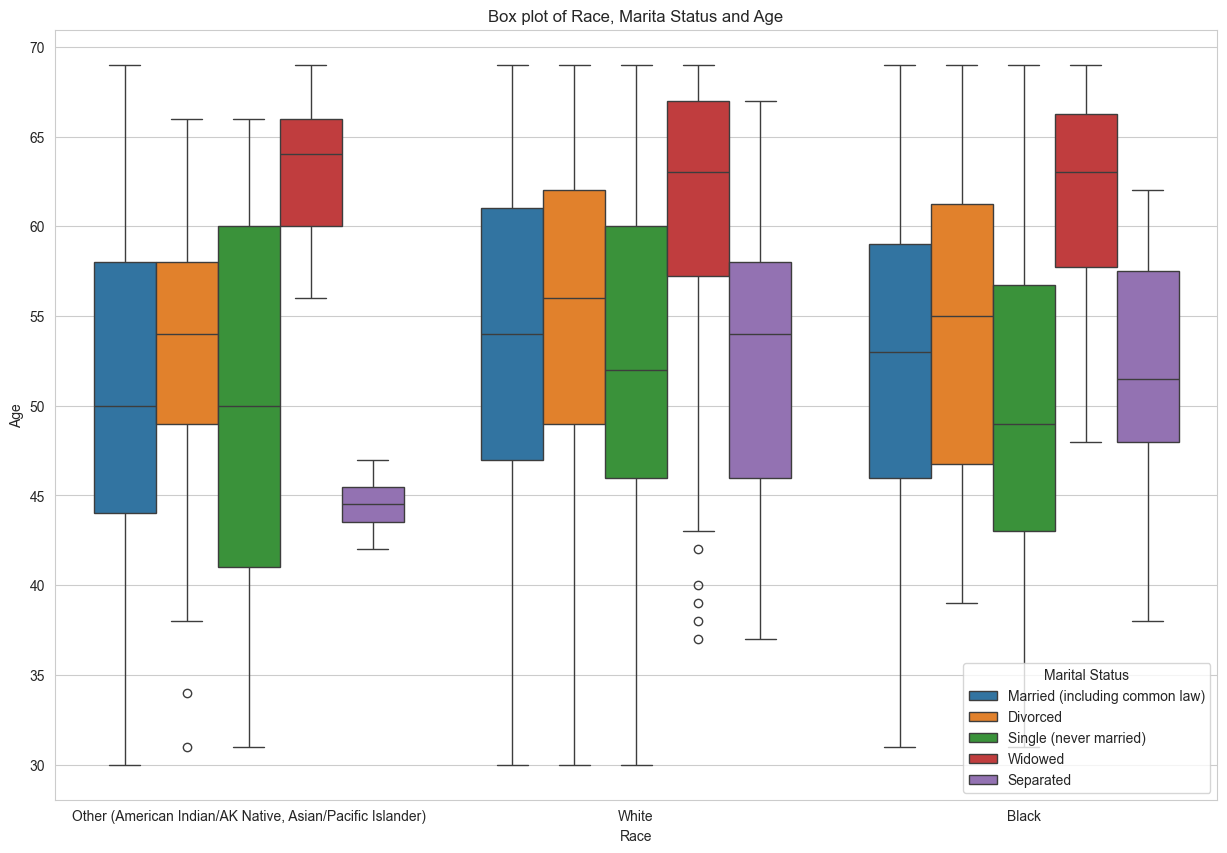

In [76]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x='Race', y='Age', hue='Marital Status', data = breast_cancer_data_2006_2010)
plt.title('Box plot of Race, Marita Status and Age')
plt.xlabel('Race')
plt.ylabel('Age')

In [77]:
# Check what insight is coming from analysing age and race variables
breast_cancer_data_2006_2010.groupby(['Marital Status','Race'])['Age'].describe()

count  \
Marital Status                 Race                                                         
Divorced                       Black                                                 40.0   
                               Other (American Indian/AK Native, Asian/Pacific...    29.0   
                               White                                                417.0   
Married (including common law) Black                                                113.0   
                               Other (American Indian/AK Native, Asian/Pacific...   237.0   
                               White                                               2293.0   
Separated                      Black                                                  8.0   
                               Other (American Indian/AK Native, Asian/Pacific...     4.0   
                               White                                                 33.0   
Single (never married)         Black                                                102.0   
                               Other (American Indian/AK Native, Asian/Pacific...    33.0   
                               White                                                480.0   
Widowed                        Black                                                 28.0   
                               Other (American Indian/AK Native, Asian/Pacific...    17.0   
                               White                                                190.0   

                                                                                        mean  \
Marital Status                 Race                                                            
Divorced                       Black                                               54.325000   
                               Other (American Indian/AK Native, Asian/Pacific...  52.448276   
                               White                                               55.395683   
Married (including common law) Black                                               52.292035   
                               Other (American Indian/AK Native, Asian/Pacific...  50.864979   
                               White                                               53.993022   
Separated                      Black                                               51.625000   
                               Other (American Indian/AK Native, Asian/Pacific...  44.500000   
                               White                                               52.363636   
Single (never married)         Black                                               49.764706   
                               Other (American Indian/AK Native, Asian/Pacific...  49.272727   
                               White                                               52.379167   
Widowed                        Black                                               61.785714   
                               Other (American Indian/AK Native, Asian/Pacific...  63.411765   
                               White                                               61.310526   

                                                                                         std  \
Marital Status                 Race                                                            
Divorced                       Black                                                8.812542   
                               Other (American Indian/AK Native, Asian/Pacific...   8.769208   
                               White                                                8.249375   
Married (including common law) Black                                                8.409902   
                               Other (American Indian/AK Native, Asian/Pacific...   9.214874   
                               White                                                8.771580   
Separated                      Black                                                7.927123   
     

Text(0, 0.5, 'Age')

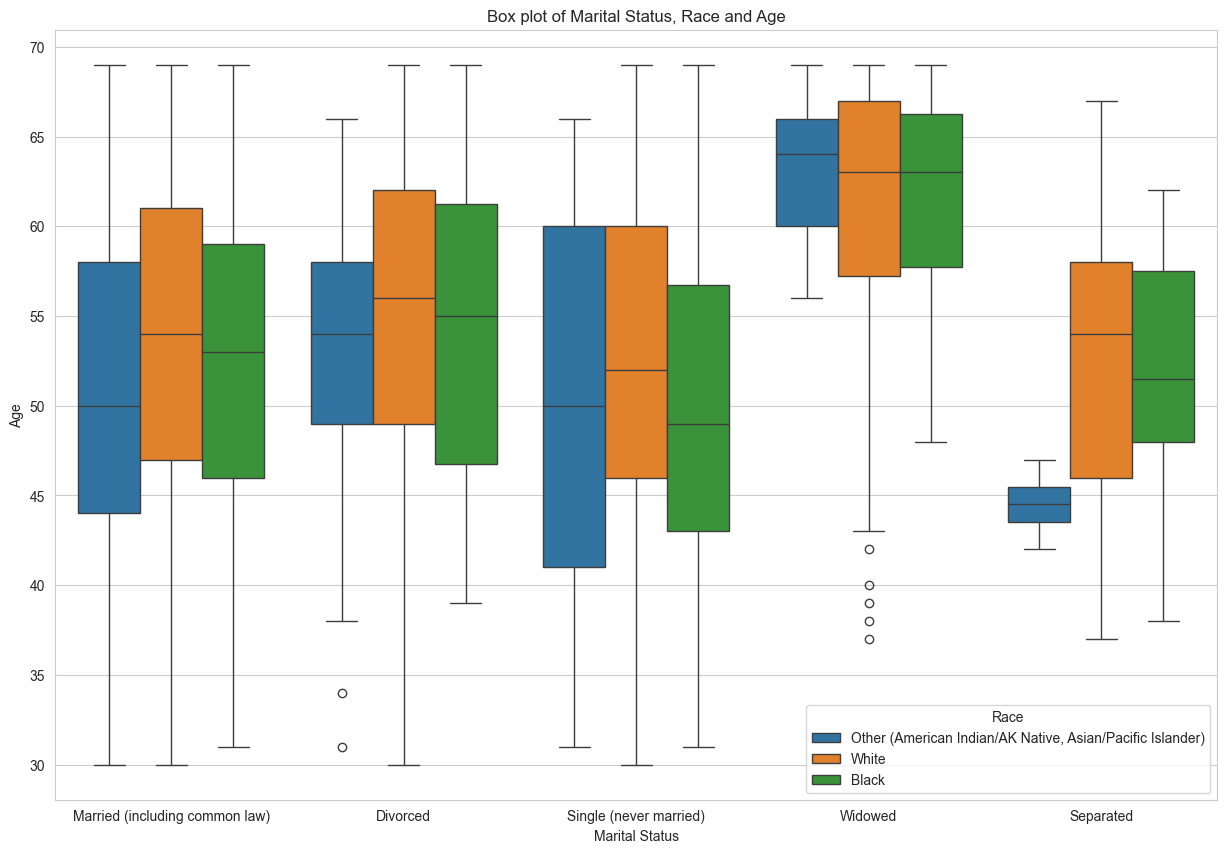

In [78]:
fig = plt.figure(figsize=(15,10))
sns.boxplot(x='Marital Status', y='Age', hue='Race', data = breast_cancer_data_2006_2010)
plt.title('Box plot of Marital Status, Race and Age')
plt.xlabel('Marital Status')
plt.ylabel('Age')

# C. Comparison of Age and Categorical variables describing the cancer stage, tumour characteristics and hormone receptor status

## **1. Bivariate analysis of age and the categorical variables describing cancer stage**

**CANCER STAGE**

**T Stage:** Tumor size classification.

**N Stage:** Regional lymph node involvement.

**6th Stage:** Overall cancer stage based on the 6th edition of the AJCC Cancer Staging Manual.

**i. T Stage**

In [79]:
breast_cancer_data_2006_2010.groupby('T_stage')['Age'].describe()

count       mean       std   min   25%   50%   75%   max
T_stage                                                           
T1       1603.0  54.648784  8.881916  30.0  48.0  55.0  62.0  69.0
T2       1786.0  53.796193  8.937812  30.0  47.0  54.0  61.0  69.0
T3        533.0  52.512195  9.148233  30.0  46.0  52.0  60.0  69.0
T4        102.0  54.049020  8.774826  33.0  48.0  55.0  60.0  69.0

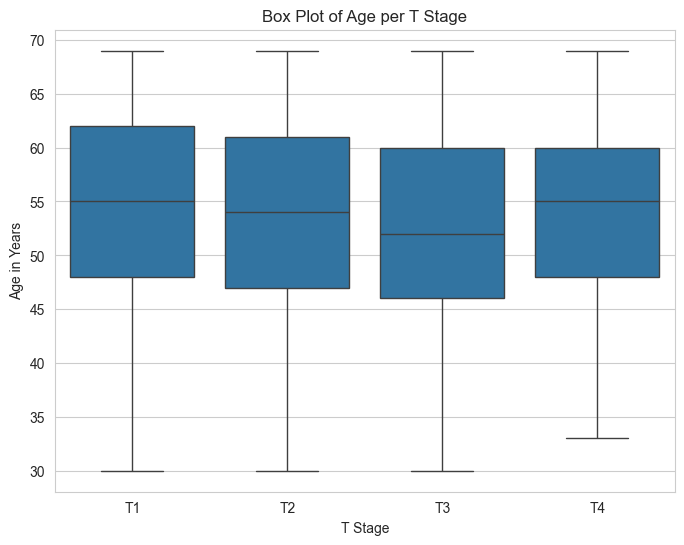

In [80]:
# visualisation of a boxplot using seaborn for comparison of age and T- Stage
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'T_stage',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['T1','T2','T3','T4'],
    width=0.8)
ax.set_xlabel('T Stage')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per T Stage')
plt.show()

**ii. N Stage**

In [81]:
breast_cancer_data_2006_2010.groupby('N_stage')['Age'].describe()

count       mean       std   min   25%   50%   75%   max
N_stage                                                           
N1       2732.0  53.986823  8.987512  30.0  47.0  54.0  62.0  69.0
N2        820.0  53.786585  8.725333  30.0  48.0  54.0  61.0  69.0
N3        472.0  54.209746  9.237861  31.0  48.0  55.0  62.0  69.0

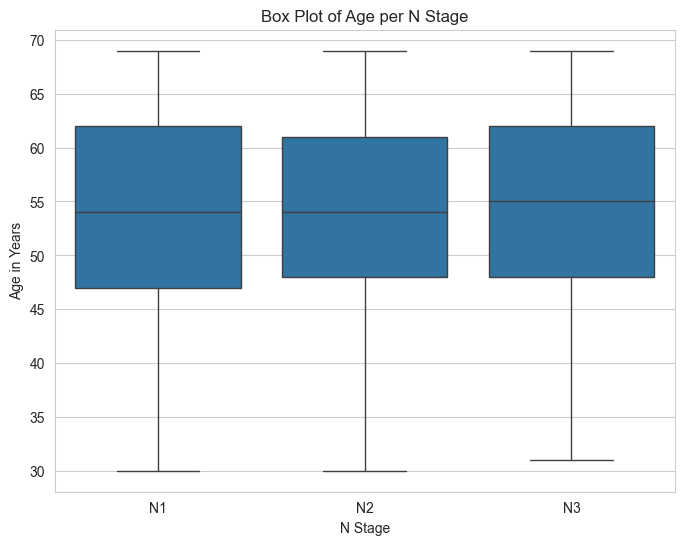

In [82]:
# visualisation of a boxplot using seaborn for comparison of age and N Stage
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'N_stage',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['N1','N2','N3'],
    width=0.8)
ax.set_xlabel('N Stage')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per N Stage')
plt.show()

iii. 6th stage versus age

In [83]:
breast_cancer_data_2006_2010.groupby('6th_stage')['Age'].describe()

count       mean       std   min   25%   50%   75%   max
6th_stage                                                           
IIA        1305.0  54.618391  8.951041  30.0  48.0  55.0  62.0  69.0
IIB        1130.0  53.422124  9.011244  30.0  47.0  53.0  61.0  69.0
IIIA       1050.0  53.668571  8.789817  30.0  47.0  54.0  61.0  69.0
IIIB         67.0  53.746269  8.517973  33.0  48.5  55.0  59.5  69.0
IIIC        472.0  54.209746  9.237861  31.0  48.0  55.0  62.0  69.0

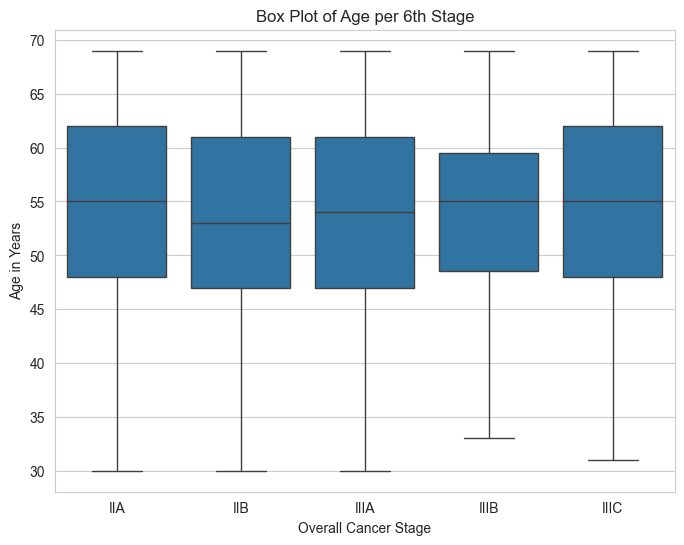

In [84]:
# visualisation of a boxplot using seaborn for comparison of age and overall cancer Stage
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  '6th_stage',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['IIA','IIB','IIIA','IIIB','IIIC'],
    width=0.8)
ax.set_xlabel('Overall Cancer Stage')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per 6th Stage')
plt.show()

## 2. **Bivariate analysis of age and the categorical variables describing tumour characteristics**

**TUMOUR CHARACTERISTICS**

**Grade:** Tumor grade, indicating aggressiveness.

**A Stage:** Anatomical stage of cancer.

i. Age versus Tumour Grade (aggressiveness) 

In [85]:
breast_cancer_data_2006_2010.groupby('Grade')['Age'].describe()

count       mean        std   min  \
Grade                                                                        
Moderately differentiated; Grade II     2351.0  54.322416   8.825148  30.0   
Poorly differentiated; Grade III        1111.0  52.615662   9.336400  30.0   
Undifferentiated; anaplastic; Grade IV    19.0  52.315789  10.786064  37.0   
Well differentiated; Grade I             543.0  55.289134   8.372729  32.0   

                                         25%   50%   75%   max  
Grade                                                           
Moderately differentiated; Grade II     48.0  55.0  62.0  69.0  
Poorly differentiated; Grade III        46.0  53.0  60.0  69.0  
Undifferentiated; anaplastic; Grade IV  43.0  52.0  60.5  69.0  
Well differentiated; Grade I            49.0  55.0  62.0  69.0

ValueError: List of boxplot statistics and `positions` values must have same the length

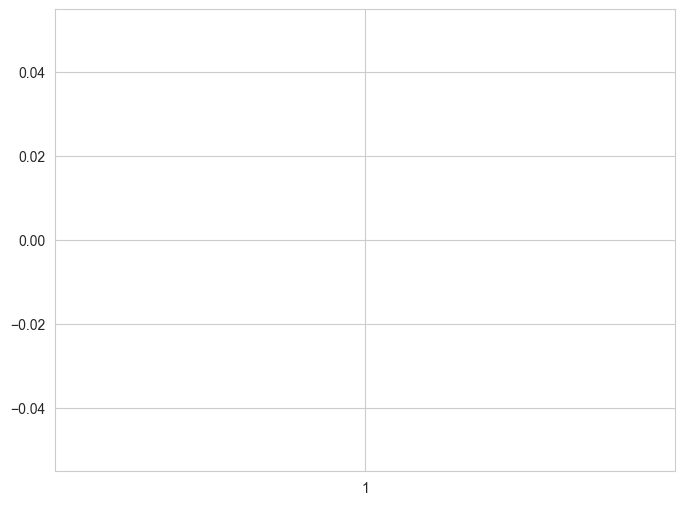

In [86]:
# visualisation of a boxplot using seaborn for comparison of age and grade of the tumour
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x = 'Grade',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['1','2','3',' anaplastic; Grade IV'],
    width=0.8)
ax.set_xlabel('tumour grade')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per tumour grade')
plt.show()

iii. Age versus A_stage (anatomical stage)

In [328]:
breast_cancer_data_2006_2010.groupby('A_stage')['Age'].describe()

count       mean       std   min   25%   50%    75%   max
A_stage                                                             
Distant     92.0  52.750000  9.326348  34.0  47.0  52.0  60.25  69.0
Regional  3932.0  54.000763  8.953695  30.0  47.0  54.0  61.00  69.0

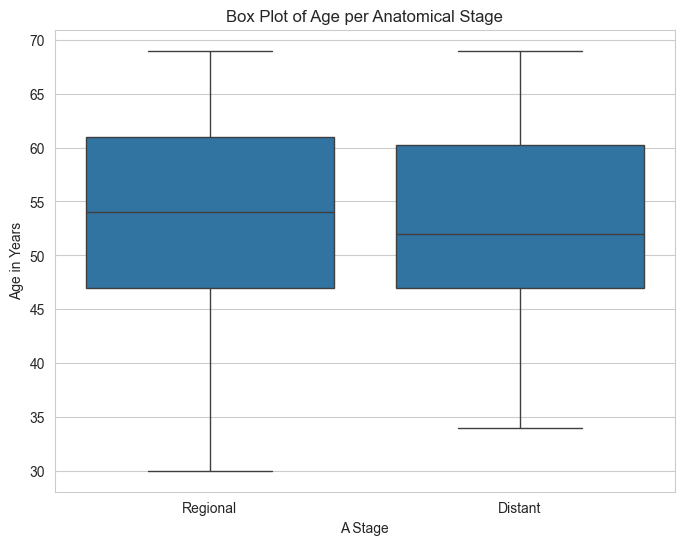

In [81]:
# visualisation of a boxplot using seaborn for comparison of age and anatomical stage of the tumour
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x = 'A_stage',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['Regional','Distant'],
    width=0.8)
ax.set_xlabel('A Stage')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per Anatomical Stage')
plt.show()

## **3. Bivariate analysis of age and the categorical variables describing the Hormone Status of breast cancer: (Estrogen status and Progesterone status)**

- Estrogen Status         
- Progesterone Status


i. estrogen status

In [329]:
breast_cancer_data_2006_2010.groupby('Estrogen Status')['Age'].describe()

count       mean       std   min   25%   50%   75%   max
Estrogen Status                                                           
Negative          269.0  51.970260  9.243748  30.0  46.0  53.0  59.0  69.0
Positive         3755.0  54.115579  8.926740  30.0  47.0  54.0  62.0  69.0

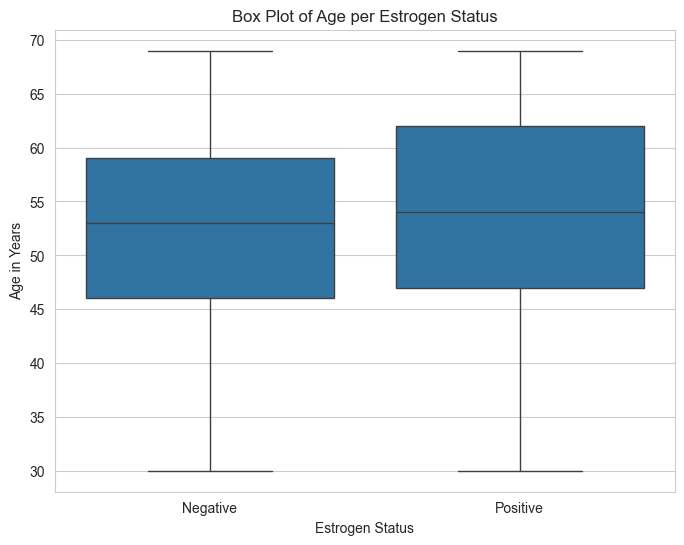

In [83]:
# visualisation of a boxplot using seaborn for comparison of age and estrogen status of the tumour
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x = 'Estrogen Status',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['Negative','Positive'],
    width=0.8)
ax.set_xlabel('Estrogen Status')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per Estrogen Status')
plt.show()

ii. progesterone status

In [331]:
breast_cancer_data_2006_2010.groupby('Progesterone Status')['Age'].describe()

count       mean       std   min   25%   50%    75%  \
Progesterone Status                                                         
Negative              698.0  54.388252  8.890517  30.0  49.0  55.0  61.75   
Positive             3326.0  53.884847  8.977179  30.0  47.0  54.0  61.00   

                      max  
Progesterone Status        
Negative             69.0  
Positive             69.0

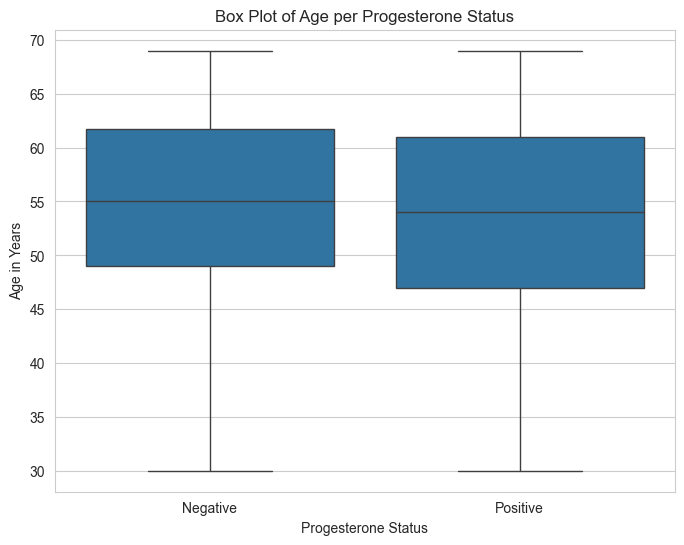

In [333]:
# visualisation of a boxplot using seaborn for comparison of age and progesterone status of the tumour
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x = 'Progesterone Status',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    order =['Negative','Positive'],
    width=0.8)
ax.set_xlabel('Progesterone Status')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per Progesterone Status')
plt.show()

count       mean       std   min   25%   50%   75%   max
Status                                                           
Alive   3408.0  53.759096  8.808420  30.0  47.0  54.0  61.0  69.0
Dead     616.0  55.150974  9.698291  30.0  48.0  56.5  63.0  69.0

# **D. Comparison of Race and the categorical variables describing the cancer stage, tumour characteristics and hormone receptor status**

## **1. Bivariate analysis of race and the categorical variables describing cancer stage; T Stage, N Stage and 6th grade**

**CANCER STAGE**

**T Stage:** Tumor size classification.

**N Stage:** Regional lymph node involvement.

**6th Stage:** Overall cancer stage based on the 6th edition of the AJCC Cancer Staging Manual.

T_stage                                               T1    T2   T3  T4
Race                                                                   
Black                                                117   132   33   9
Other (American Indian/AK Native, Asian/Pacific...   113   162   41   4
White                                               1373  1492  459  89


Text(0.5, 0, 'Number of patients')

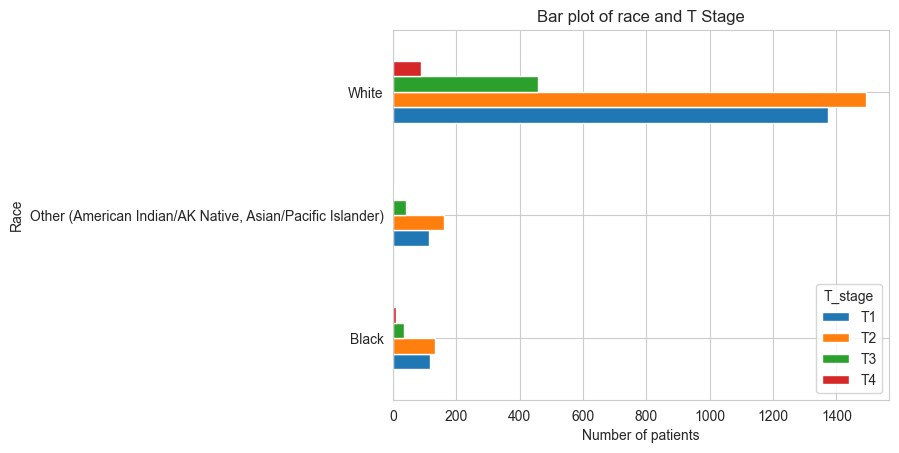

In [338]:
# Compare the race of the patients and the T_ stage at diagnosis
race_T_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['T_stage'])
print(race_T_stage_ctab)
barplot = race_T_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of race and T Stage')
plt.ylabel('Race')
plt.xlabel('Number of patients')

N_stage                                               N1   N2   N3
Race                                                              
Black                                                184   63   44
Other (American Indian/AK Native, Asian/Pacific...   211   74   35
White                                               2337  683  393


Text(0.5, 0, 'Number of patients')

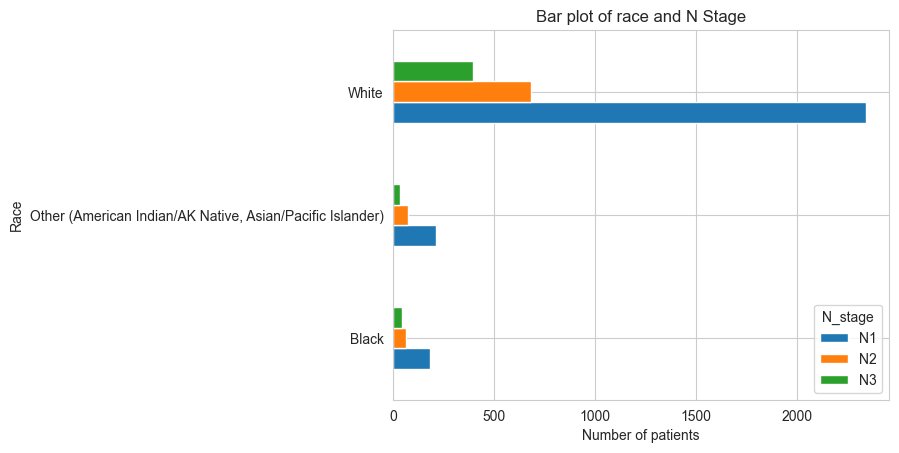

In [339]:
# Compare the race of the patients and the N_ stage at diagnosis
race_N_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['N_stage'])
print(race_N_stage_ctab)
barplot = race_N_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of race and N Stage')
plt.ylabel('Race')
plt.xlabel('Number of patients')

6th_stage                                            IIA  IIB  IIIA  IIIB  \
Race                                                                        
Black                                                 91   81    69     6   
Other (American Indian/AK Native, Asian/Pacific...    90   95    96     4   
White                                               1124  954   885    57   

6th_stage                                           IIIC  
Race                                                      
Black                                                 44  
Other (American Indian/AK Native, Asian/Pacific...    35  
White                                                393  


Text(0.5, 0, 'Number of patients')

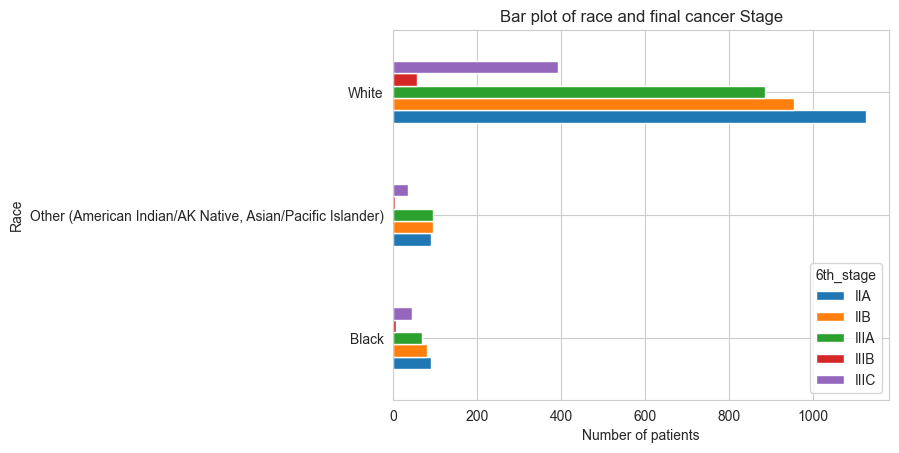

In [340]:
# Compare the race of the patients and the 6th_ stage at diagnosis
race_6th_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['6th_stage'])
print(race_6th_stage_ctab)
barplot = race_6th_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of race and final cancer Stage')
plt.ylabel('Race')
plt.xlabel('Number of patients')

## **2.Bivariate analysis of race and the categorical variables describing tumour characteristics**

**Grade:** Tumor grade, indicating aggressiveness.

**A Stage:** Anatomical stage of cancer.

Grade                                               Moderately differentiated; Grade II  \
Race                                                                                      
Black                                                                               141   
Other (American Indian/AK Native, Asian/Pacific...                                  180   
White                                                                              2030   

Grade                                               Poorly differentiated; Grade III  \
Race                                                                                   
Black                                                                            115   
Other (American Indian/AK Native, Asian/Pacific...                                94   
White                                                                            902   

Grade                                               Undifferentiated; anaplastic; Grade IV  \
Race     

Text(0.5, 0, 'Number of patients')

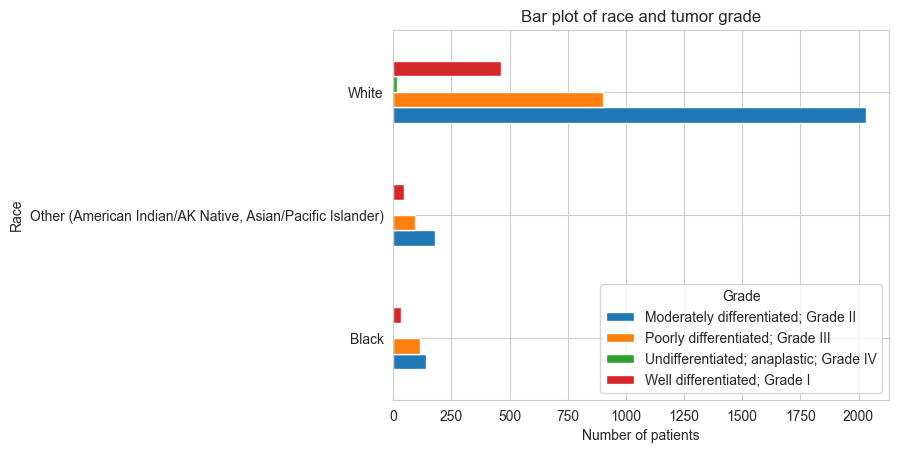

In [343]:
# Compare the race of the patients and the tumour grade
race_grade_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['Grade'])
print(race_grade_ctab)
barplot = race_grade_ctab.plot.barh(rot=0)
plt.title('Bar plot of race and tumor grade')
plt.ylabel('Race')
plt.xlabel('Number of patients')

A_stage                                             Distant  Regional
Race                                                                 
Black                                                     8       283
Other (American Indian/AK Native, Asian/Pacific...        7       313
White                                                    77      3336


Text(0.5, 0, 'Number of patients')

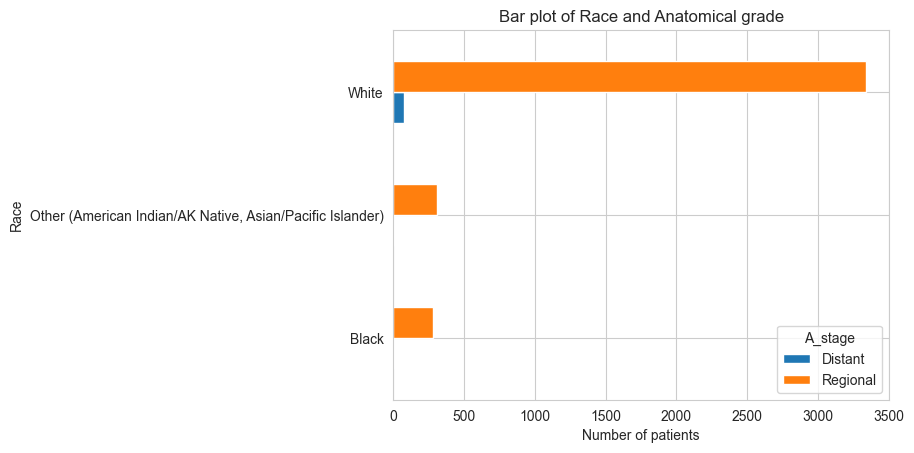

In [346]:
# Compare the race of the patients and the anatomical stage of the tumour
A_stage_grade_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['A_stage'])
print(A_stage_grade_ctab)
barplot = A_stage_grade_ctab.plot.barh(rot=0)
plt.title('Bar plot of Race and Anatomical grade')
plt.ylabel('Race')
plt.xlabel('Number of patients')

## **3. Bivariate analysis of race and the categorical variables describing hormonal status of the breast tumour**

Estrogen Status                                     Negative  Positive
Race                                                                  
Black                                                     33       258
Other (American Indian/AK Native, Asian/Pacific...        27       293
White                                                    209      3204


Text(0.5, 0, 'Number of patients')

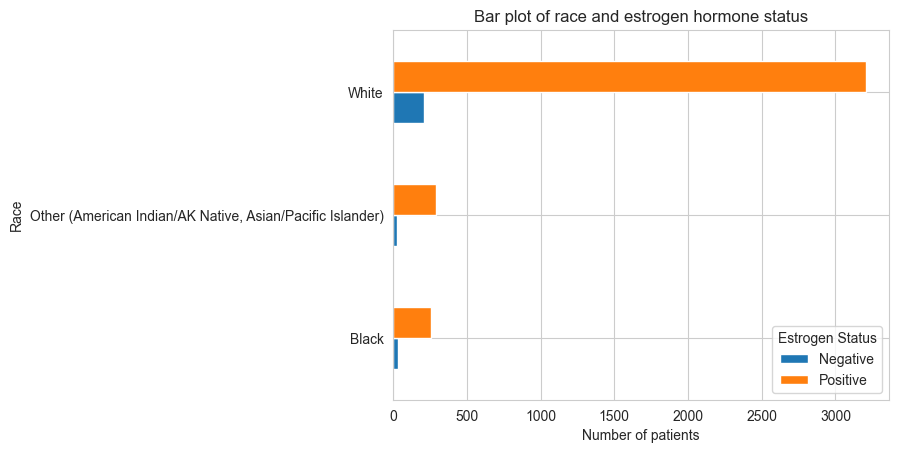

In [348]:
# Compare the race of the patients and the estrogen status at diagnosis
race_estrogen_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['Estrogen Status'])
print(race_estrogen_status_ctab)
barplot = race_estrogen_status_ctab.plot.barh(rot=0)
plt.title('Bar plot of race and estrogen hormone status')
plt.ylabel('Race')
plt.xlabel('Number of patients')

Progesterone Status                                 Negative  Positive
Race                                                                  
Black                                                     64       227
Other (American Indian/AK Native, Asian/Pacific...        58       262
White                                                    576      2837


Text(0.5, 0, 'Number of patients')

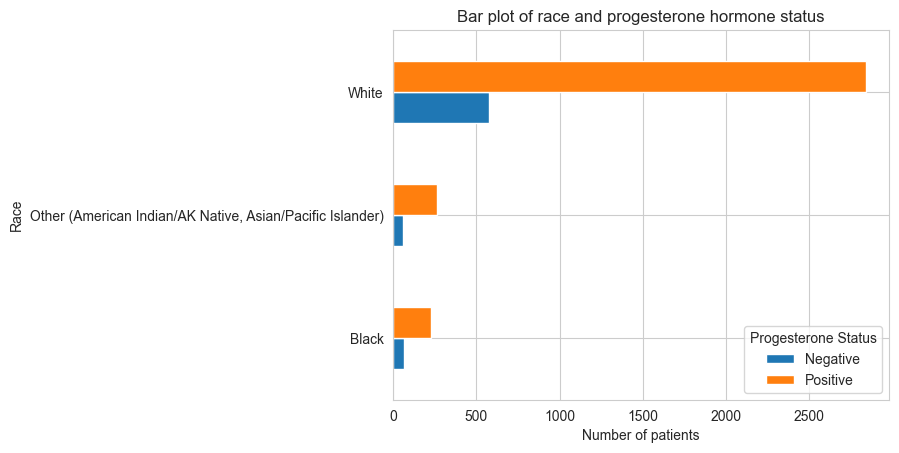

In [350]:
# Compare the race of the patients and the progesterone status at diagnosis
race_progesterone_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['Progesterone Status'])
print(race_progesterone_status_ctab)
barplot = race_progesterone_status_ctab.plot.barh(rot=0)
plt.title('Bar plot of race and progesterone hormone status')
plt.ylabel('Race')
plt.xlabel('Number of patients')

# E. **Analysis of Marital Status and the categorical variables describing cancer stage, tumour characteristcis and hormonal status**

## **1. Bivariate analysis of marital status and each of the categorical variables describing cancer stage; T Stage, N Stage and 6th grade**

T_stage                           T1    T2   T3  T4
Marital Status                                     
Divorced                         179   227   62  18
Married (including common law)  1091  1140  354  58
Separated                         16    24    3   2
Single (never married)           225   288   81  21
Widowed                           92   107   33   3


Text(0.5, 0, 'Number of patients')

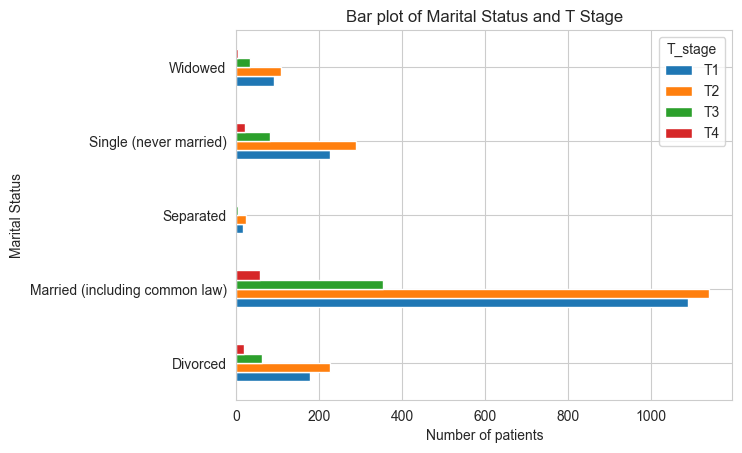

In [354]:
# Compare the marital status of the patients and the T_ stage at diagnosis
marital_status_T_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['T_stage'])
print(marital_status_T_stage_ctab)
barplot = marital_status_T_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of Marital Status and T Stage')
plt.ylabel('Marital Status')
plt.xlabel('Number of patients')

N_stage                           N1   N2   N3
Marital Status                                
Divorced                         317   94   75
Married (including common law)  1832  524  287
Separated                         26    9   10
Single (never married)           408  144   63
Widowed                          149   49   37


Text(0.5, 0, 'Number of patients')

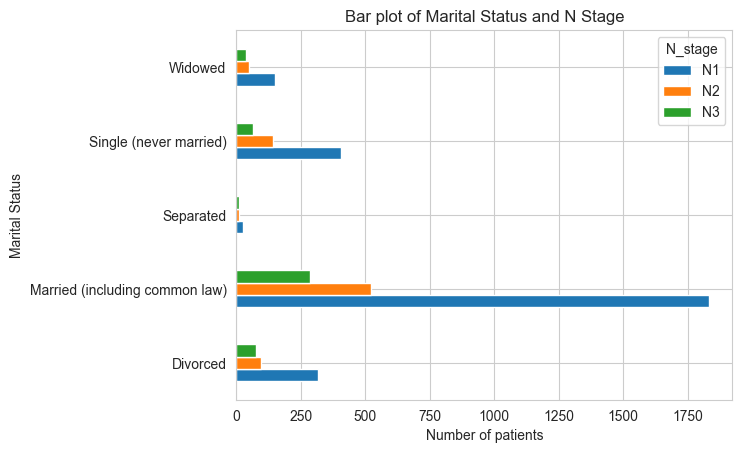

In [356]:
# Compare the marital status of the patients and the N_ stage at diagnosis
marital_status_N_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['N_stage'])
print(marital_status_N_stage_ctab)
barplot = marital_status_N_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of Marital Status and N Stage')
plt.ylabel('Marital Status')
plt.xlabel('Number of patients')

6th_stage                       IIA  IIB  IIIA  IIIB  IIIC
Marital Status                                            
Divorced                        140  141   119    11    75
Married (including common law)  892  732   689    43   287
Separated                        11   13    11     0    10
Single (never married)          188  185   167    12    63
Widowed                          74   59    64     1    37


Text(0.5, 0, 'Number of patients')

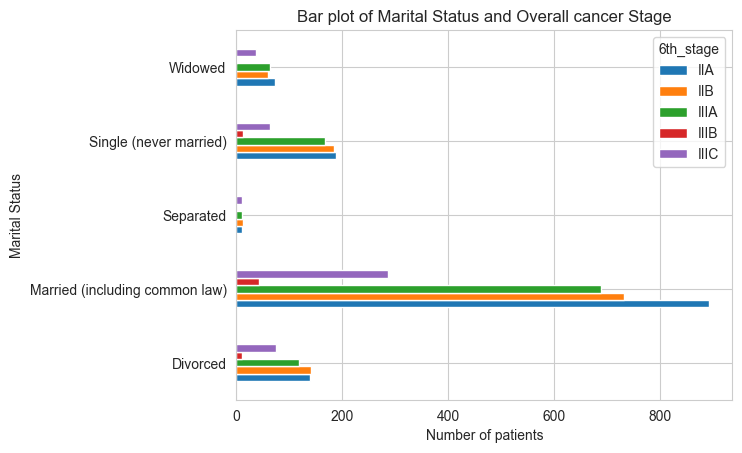

In [357]:
# Compare the marital status of the patients and the 6th_ stage(overall cancer stage) at diagnosis
marital_status_6th_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['6th_stage'])
print(marital_status_6th_stage_ctab)
barplot = marital_status_6th_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of Marital Status and Overall cancer Stage')
plt.ylabel('Marital Status')
plt.xlabel('Number of patients')

## **2.Bivariate analysis of marital status and each of the categorical variables describing tumour characteristics**

**Grade:** Tumor grade, indicating aggressiveness.

**A Stage:** Anatomical stage of cancer.

Grade                           Moderately differentiated; Grade II  \
Marital Status                                                        
Divorced                                                        288   
Married (including common law)                                 1569   
Separated                                                        24   
Single (never married)                                          342   
Widowed                                                         128   

Grade                           Poorly differentiated; Grade III  \
Marital Status                                                     
Divorced                                                     145   
Married (including common law)                               698   
Separated                                                     12   
Single (never married)                                       191   
Widowed                                                       65   

Grade                    

Text(0.5, 0, 'Number of patients')

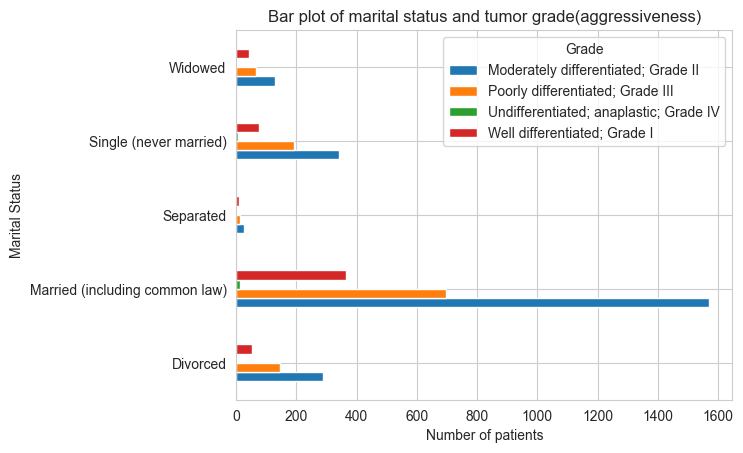

In [360]:
# Compare the marital status of the patients and the level of tumour cell differentiation
marital_status_grade_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['Grade'])
print(marital_status_grade_ctab)
barplot = marital_status_grade_ctab.plot.barh(rot=0)
plt.title('Bar plot of marital status and tumor grade(aggressiveness)')
plt.ylabel('Marital Status')
plt.xlabel('Number of patients')

A_stage                         Distant  Regional
Marital Status                                   
Divorced                             15       471
Married (including common law)       54      2589
Separated                             3        42
Single (never married)               17       598
Widowed                               3       232


Text(0.5, 0, 'Number of patients')

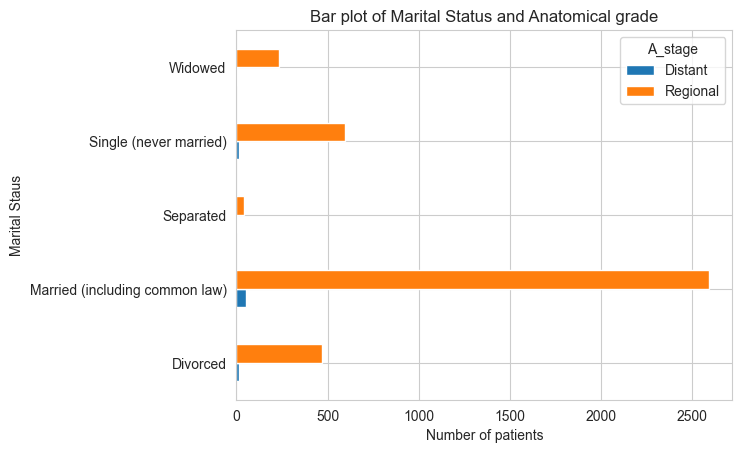

In [362]:
# Compare the marital status of the patients and the anatomical stage of the tumour
marital_status_a_stage_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['A_stage'])
print(marital_status_a_stage_ctab)
barplot = marital_status_a_stage_ctab.plot.barh(rot=0)
plt.title('Bar plot of Marital Status and Anatomical grade')
plt.ylabel('Marital Staus')
plt.xlabel('Number of patients')

Status           Alive  Dead
Estrogen Status             
Negative           161   108
Positive          3247   508


Text(0, 0.5, 'Number of patients')

<Figure size 2000x1500 with 0 Axes>

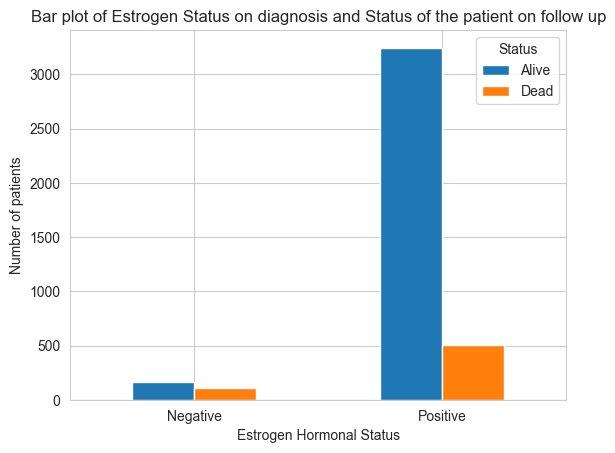

In [109]:
Estrogen_status_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Estrogen Status'], breast_cancer_data_2006_2010['Status'])
print(Estrogen_status_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = Estrogen_status_versus_status.plot.bar(rot=0)
plt.title('Bar plot of Estrogen Status on diagnosis and Status of the patient on follow up')
plt.xlabel('Estrogen Hormonal Status')
plt.ylabel('Number of patients')

10. Bivariate analysis of Progesterone Status and status of the patient on follow up

Status               Alive  Dead
Progesterone Status             
Negative               494   204
Positive              2914   412


Text(0, 0.5, 'Number of patients')

<Figure size 2000x1500 with 0 Axes>

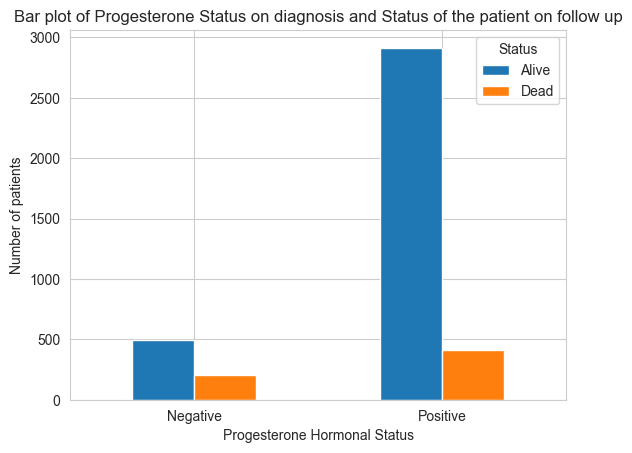

In [110]:
progesterone_status_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Progesterone Status'], breast_cancer_data_2006_2010['Status'])
print(progesterone_status_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = progesterone_status_versus_status.plot.bar(rot=0)
plt.title('Bar plot of Progesterone Status on diagnosis and Status of the patient on follow up')
plt.xlabel('Progesterone Hormonal Status')
plt.ylabel('Number of patients')

## **3. Bivariate analysis of marital status and each of the the categorical variables describing hormonal status of the breast tumour**

a. Estrogen Status

Estrogen Status                 Negative  Positive
Marital Status                                    
Divorced                              27       459
Married (including common law)       173      2470
Separated                              7        38
Single (never married)                47       568
Widowed                               15       220


Text(0, 0.5, 'Number of patients')

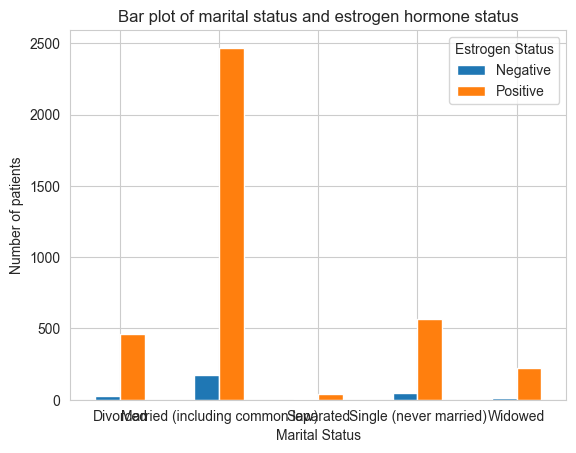

In [135]:
# Compare the marital status of the patients and the estrogen status at diagnosis
marital_status_estrogen_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['Estrogen Status'])
print(marital_status_estrogen_status_ctab)
barplot = marital_status_estrogen_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of marital status and estrogen hormone status')
plt.xlabel('Marital Status')
plt.ylabel('Number of patients')

b. Progesterone Status

Progesterone Status  Negative  Positive
Marital Status                         
Divorced                   90       396
Married                   439      2204
Separated                  15        30
Single                    106       509
Widowed                    48       187


Text(0, 0.5, 'Number of patients')

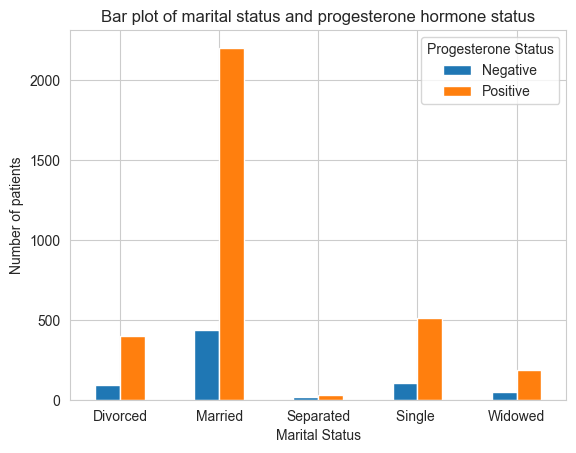

In [112]:
# Compare the marital status of the patients and the progesterone status at diagnosis
marital_status_progesterone_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['Progesterone Status'])
print(marital_status_progesterone_status_ctab)
barplot = marital_status_progesterone_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of marital status and progesterone hormone status')
plt.xlabel('Marital Status')
plt.ylabel('Number of patients')

# **F. Analysis of the categorical patient demographic variables and the outcome of survival in months**

## 1. Analysis of race and survival in months

In [121]:
breast_cancer_data_2006_2010.groupby('Race')['Survival Months'].describe()

count       mean        std  min   25%   50%    75%    max
Race                                                              
Black   291.0  66.611684  24.805528  4.0  51.5  67.0  86.00  107.0
Other   320.0  73.221875  23.075129  1.0  58.0  77.0  91.25  107.0
White  3413.0  71.517140  22.696428  2.0  56.0  73.0  90.00  107.0

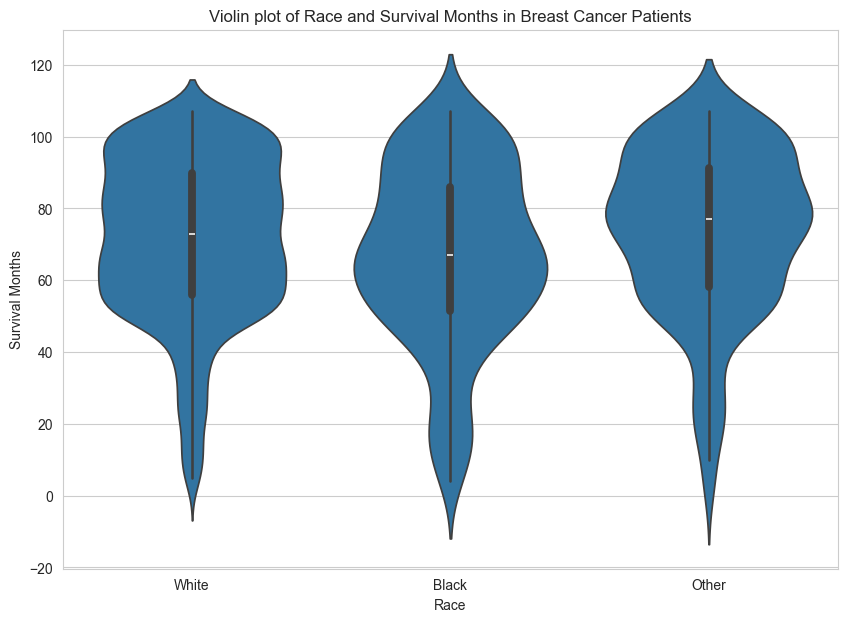

In [122]:
# Visualization of comparison of race and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Race', 
    y='Survival Months')
plt.title('Violin plot of Race and Survival Months in Breast Cancer Patients')
plt.show()

## 2. Analysis of Marital Status and survival in months

In [123]:
breast_cancer_data_2006_2010.groupby('Marital Status')['Survival Months'].describe()

count       mean        std  min   25%   50%   75%    max
Marital Status                                                            
Divorced         486.0  70.520576  23.515088  2.0  58.0  72.0  88.0  107.0
Married         2643.0  71.979569  22.314920  1.0  56.0  74.0  90.0  107.0
Separated         45.0  61.911111  25.629193  4.0  48.0  67.0  81.0  100.0
Single           615.0  70.422764  24.023810  3.0  56.0  71.0  90.0  107.0
Widowed          235.0  69.327660  24.436362  4.0  55.5  70.0  89.5  107.0

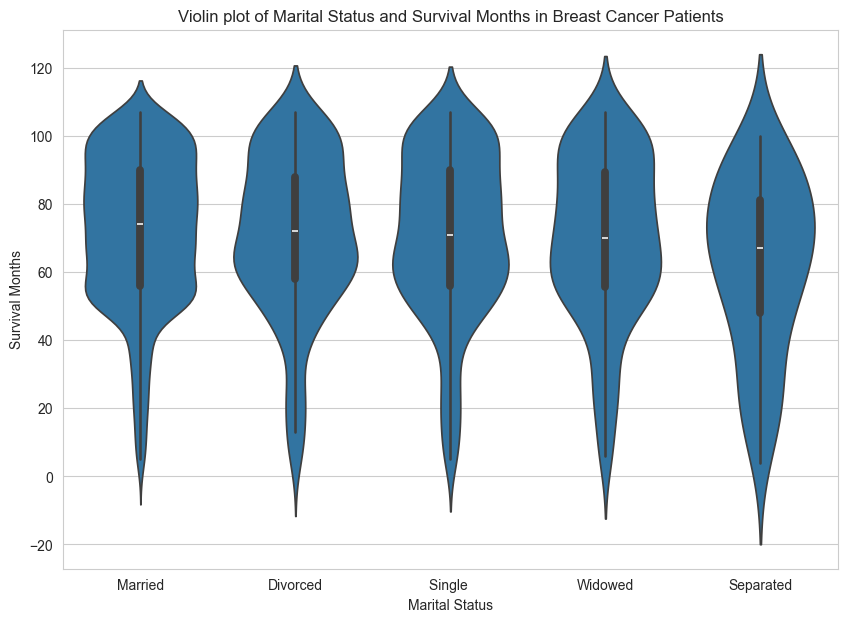

In [124]:
# Visualization of comparison of marital status and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Marital Status', 
    y='Survival Months')
plt.title('Violin plot of Marital Status and Survival Months in Breast Cancer Patients')
plt.show()

# **G. Analysis of the categorical disease variables and Survival in Months**

## 1. Analysis of cancer stage and survival in months
   
- T Stage                
- N_stage                 
- 6th_stage 

In [125]:
# Analysis of the relationship between the T stage at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('T_stage')['Survival Months'].describe()

count       mean        std  min   25%   50%   75%    max
T_stage                                                            
T1       1603.0  73.563943  21.731195  2.0  58.5  75.0  92.0  107.0
T2       1786.0  70.301232  23.319675  1.0  56.0  72.0  89.0  107.0
T3        533.0  68.885553  23.562109  4.0  54.0  69.0  88.0  107.0
T4        102.0  65.745098  27.216654  9.0  43.5  73.0  89.0  107.0

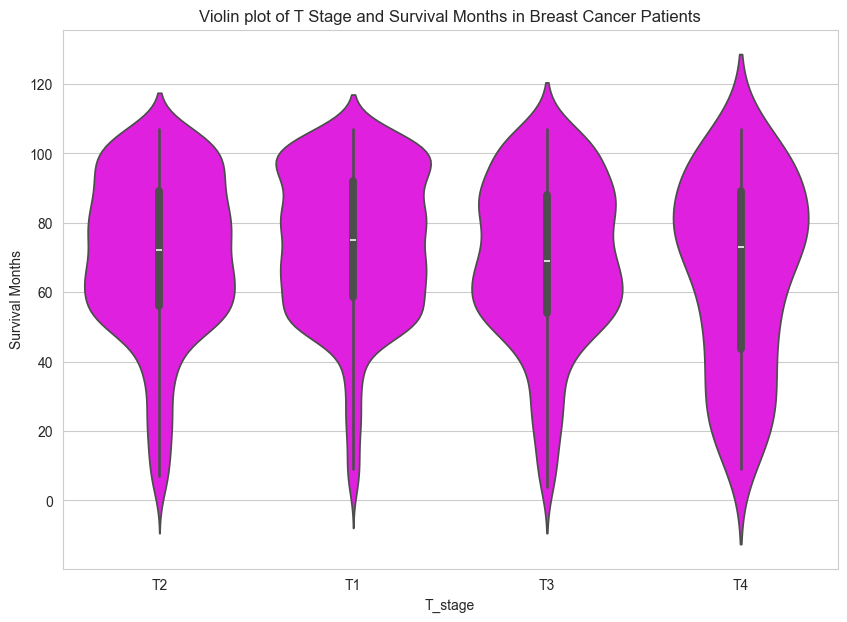

In [201]:
# Visualization of relationship between T_stage at diagnosis and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='T_stage',
    y='Survival Months',
    color='Magenta')
plt.title('Violin plot of T Stage and Survival Months in Breast Cancer Patients')
plt.show()

In [127]:
# Analysis of the relationship between the N_STAGE at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('N_stage')['Survival Months'].describe()

count       mean        std  min    25%   50%   75%    max
N_stage                                                             
N1       2732.0  73.169107  21.608360  2.0  58.00  75.0  91.0  107.0
N2        820.0  69.714634  23.601940  2.0  55.00  70.0  89.0  107.0
N3        472.0  63.218220  26.860911  1.0  45.75  66.0  84.0  107.0

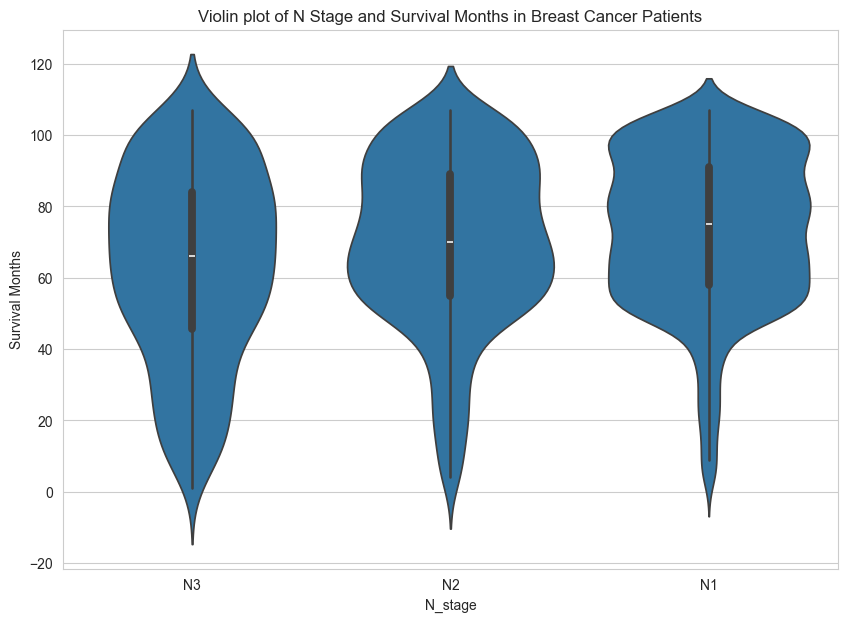

In [184]:
# Visualization of comparison of N_stage and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='N_stage', 
    y='Survival Months')
plt.title('Violin plot of N Stage and Survival Months in Breast Cancer Patients')
plt.show()

In [185]:
# Analysis of the relationship between the 6TH stage (0VERALL CANCER STAGE) at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('6th_stage')['Survival Months'].describe()

count       mean        std   min    25%   50%   75%    max
6th_stage                                                              
IIA        1305.0  74.408429  21.286234   2.0  60.00  76.0  93.0  107.0
IIB        1130.0  72.223009  21.972843   2.0  57.00  74.0  89.0  107.0
IIIA       1050.0  70.188571  22.940273   2.0  56.00  70.5  89.0  107.0
IIIB         67.0  69.417910  24.590063  16.0  51.50  74.0  89.0  107.0
IIIC        472.0  63.218220  26.860911   1.0  45.75  66.0  84.0  107.0

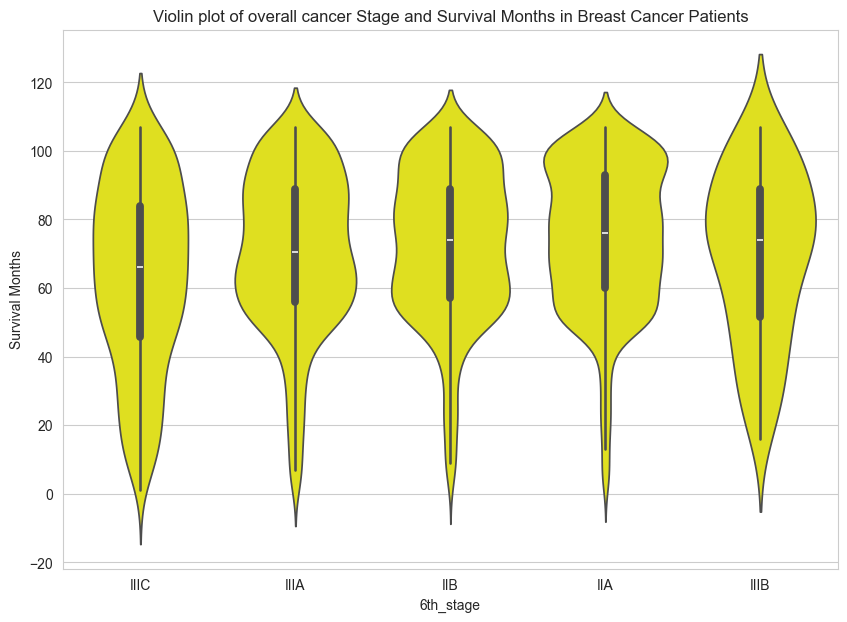

In [204]:
# Visualization of comparison of overall cancer_stage and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='6th_stage', 
    y='Survival Months',
    color= 'Yellow')
plt.title('Violin plot of overall cancer Stage and Survival Months in Breast Cancer Patients')
plt.show()

## 2. Analyis of Tumour characteristics and survival in months
         
- Grade                  
- A_stage 

In [397]:
# Analysis of the relationship between the Grade at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('Grade')['Survival Months'].describe()

count       mean        std  min  \
Grade                                                                       
Moderately differentiated; Grade II     2351.0  72.179073  22.191350  1.0   
Poorly differentiated; Grade III        1111.0  68.749775  24.887394  2.0   
Undifferentiated; anaplastic; Grade IV    19.0  64.421053  32.658699  9.0   
Well differentiated; Grade I             543.0  72.937385  20.966934  5.0   

                                         25%   50%   75%    max  
Grade                                                            
Moderately differentiated; Grade II     57.0  73.0  90.0  107.0  
Poorly differentiated; Grade III        53.0  70.0  89.0  107.0  
Undifferentiated; anaplastic; Grade IV  33.5  75.0  91.0  102.0  
Well differentiated; Grade I            58.0  74.0  89.0  107.0

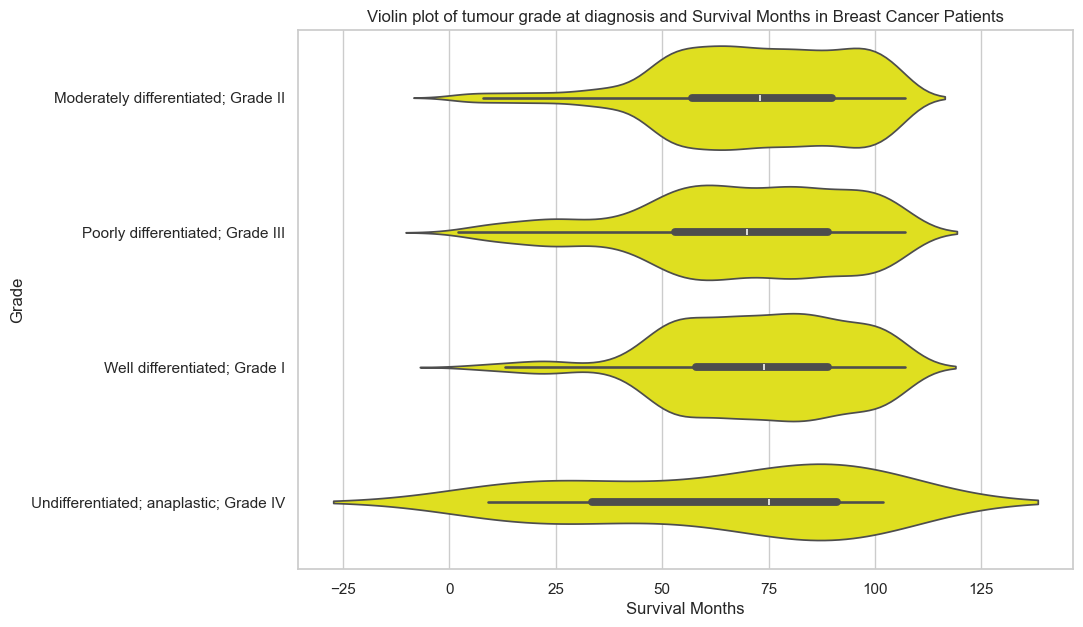

In [230]:
# Visualization of comparison of tumour grade and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    y ='Grade', 
    x='Survival Months',
    color= 'Yellow')
plt.title('Violin plot of tumour grade at diagnosis and Survival Months in Breast Cancer Patients')
plt.xlabel('Survival Months')
plt.show()

In [405]:
# Analysis of the relationship between the anatomical stage at diagnosis and survival in months on follow up
breast_cancer_data_2006_2010.groupby('A_stage')['Survival Months'].describe()

count       mean        std  min   25%   50%    75%    max
A_stage                                                              
Distant     92.0  60.793478  28.733538  8.0  40.0  60.5  86.25  107.0
Regional  3932.0  71.543744  22.714152  1.0  56.0  73.0  90.00  107.0

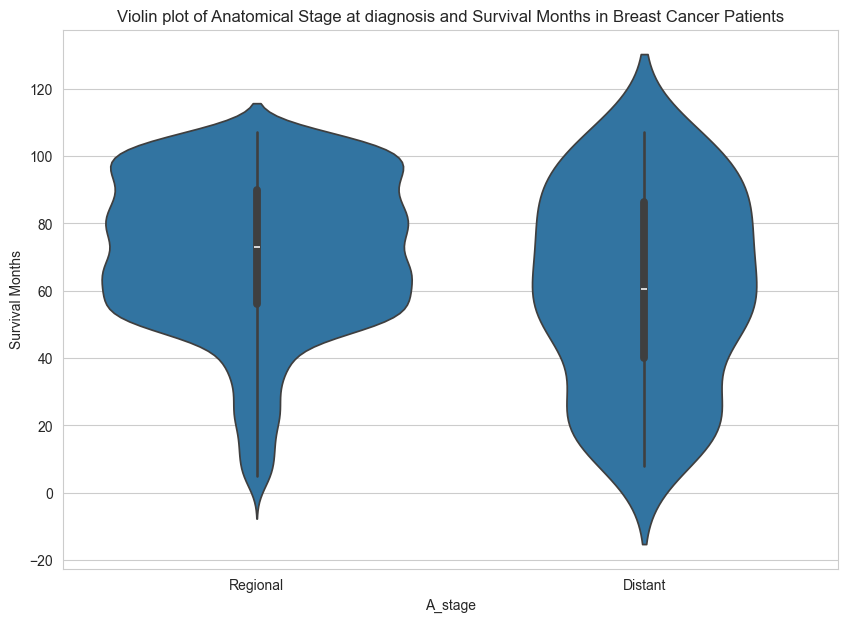

In [190]:
# Visualization of comparison of tumour grade and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='A_stage', 
    y='Survival Months')
plt.title('Violin plot of Anatomical Stage at diagnosis and Survival Months in Breast Cancer Patients')
plt.show()

## 3. **Analysis of hormonal status of the breast tumour and survival in months**

In [407]:
breast_cancer_data_2006_2010.groupby('Estrogen Status')['Survival Months'].describe()

count       mean        std  min   25%   50%   75%    max
Estrogen Status                                                            
Negative          269.0  60.297398  30.502398  5.0  30.0  64.0  87.0  107.0
Positive         3755.0  72.086019  22.075458  1.0  57.0  73.0  90.0  107.0

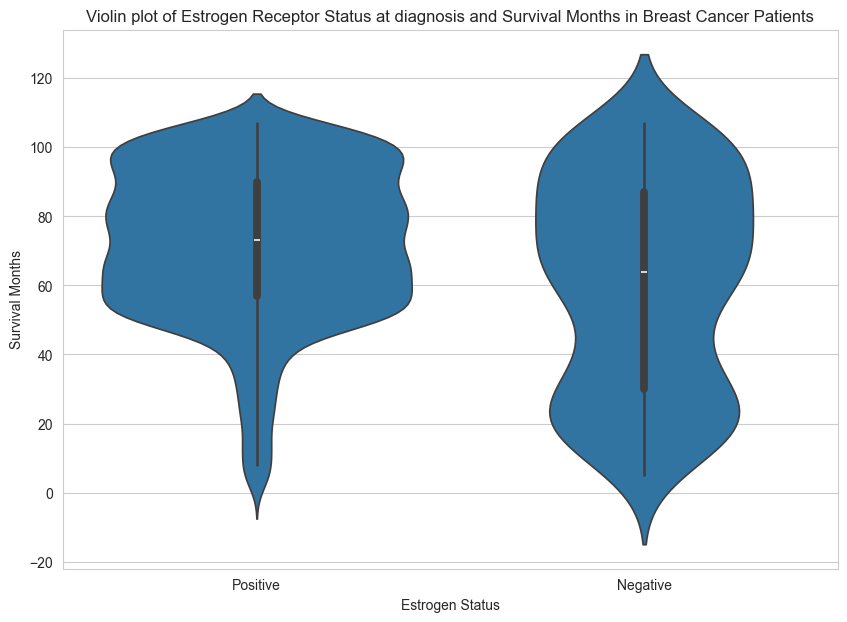

In [132]:
# Visualization of comparison of estrogen status and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Estrogen Status', 
    y='Survival Months')
plt.title('Violin plot of Estrogen Receptor Status at diagnosis and Survival Months in Breast Cancer Patients')
plt.show()

In [409]:
breast_cancer_data_2006_2010.groupby('Progesterone Status')['Survival Months'].describe()

count       mean        std  min   25%   50%   75%  \
Progesterone Status                                                        
Negative              698.0  66.494269  27.560927  4.0  49.0  69.0  90.0   
Positive             3326.0  72.306073  21.693147  1.0  57.0  74.0  90.0   

                       max  
Progesterone Status         
Negative             107.0  
Positive             107.0

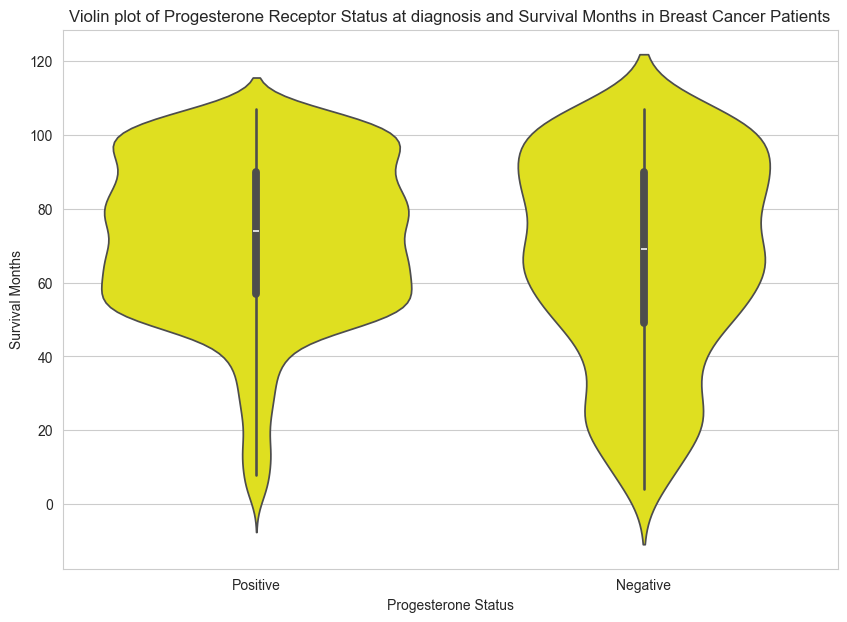

In [131]:
# Visualization of comparison of progesterone status and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Progesterone Status', 
    y='Survival Months',
    color = 'yellow')
plt.title('Violin plot of Progesterone Receptor Status at diagnosis and Survival Months in Breast Cancer Patients')
plt.show()

# H. Analysis of the categorical patient demographic variables and the status on follow up



## 1. Marital Status and status on follow up

Status                          Alive  Dead
Marital Status                             
Divorced                          396    90
Married (including common law)   2285   358
Separated                          30    15
Single (never married)            511   104
Widowed                           186    49


Text(0.5, 0, 'Count of patients')

<Figure size 1500x1000 with 0 Axes>

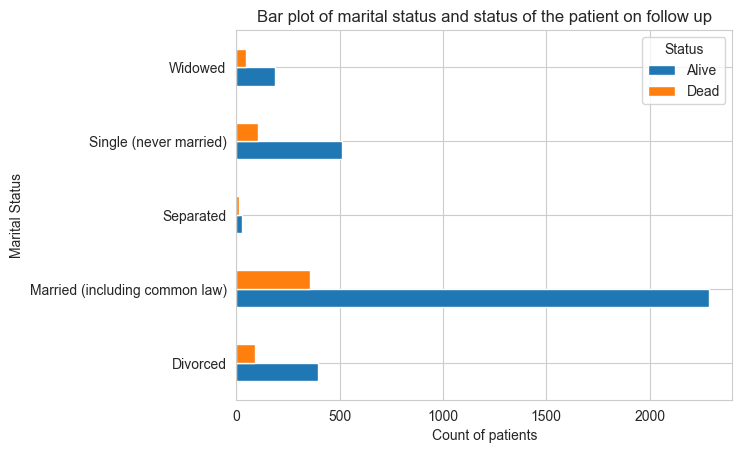

In [411]:
# Determine relationship between race and the status of the patient
marital_status_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Marital Status'], breast_cancer_data_2006_2010['Status'])
print(marital_status_versus_status)
fig = plt.figure(figsize=(15,10))
barplot = marital_status_versus_status.plot.barh(rot=0)
plt.title('Bar plot of marital status and status of the patient on follow up')
plt.ylabel('Marital Status')
plt.xlabel('Count of patients')

##  2. Race and Status on follow up

Status                                              Alive  Dead
Race                                                           
Black                                                 218    73
Other (American Indian/AK Native, Asian/Pacific...    287    33
White                                                2903   510


Text(0.5, 0, 'Number of patients')

<Figure size 1500x1000 with 0 Axes>

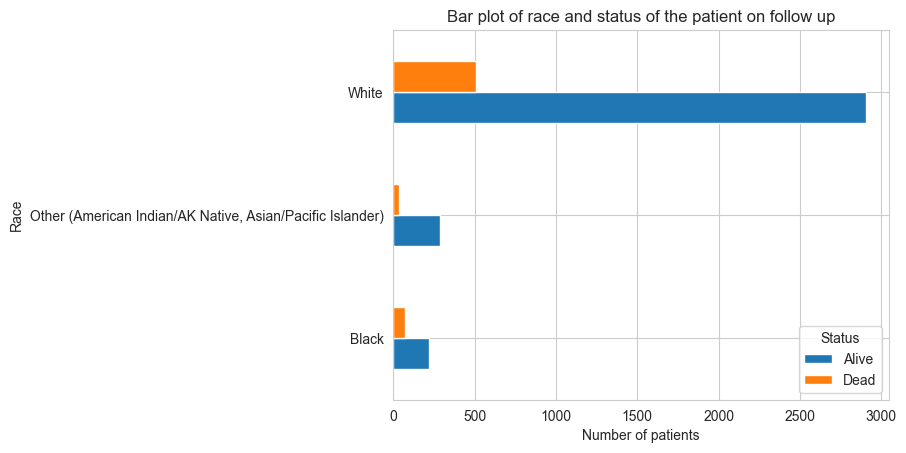

In [412]:
# Determine relationship between race and the status of the patient
race_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Race'], breast_cancer_data_2006_2010['Status'])
print(race_versus_status)
fig = plt.figure(figsize=(15,10))
barplot = race_versus_status.plot.barh(rot=0)
plt.title('Bar plot of race and status of the patient on follow up')
plt.ylabel('Race')
plt.xlabel('Number of patients')

# **I. Analysis of the categorical disease variables and status on follow up**

## 1. Analysis of the cancer stages and status on follow up

T_stage    T1    T2   T3  T4
Status                      
Alive    1446  1483  417  62
Dead      157   303  116  40


Text(0, 0.5, 'Count of Patients')

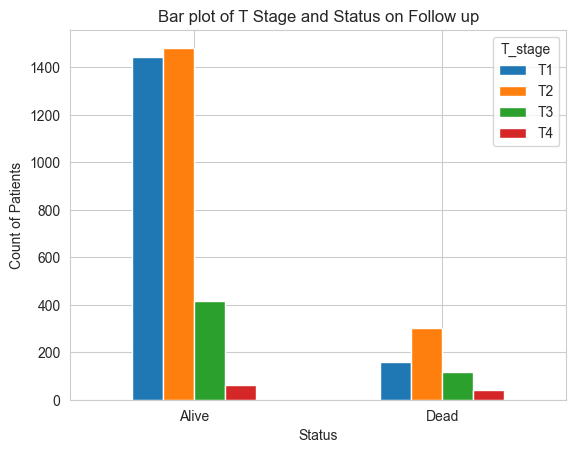

In [130]:
# Compare the T_ Stage at diagnosis and Status of the patient on follow up
T_stage_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['T_stage'])
print(T_stage_status_ctab)
barplot = T_stage_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of T Stage and Status on Follow up')
plt.xlabel('Status')
plt.ylabel('Count of Patients')

In [139]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010.Status,breast_cancer_data_2006_2010.T_stage, normalize='index')

T_stage        T1        T2        T3        T4
Status                                         
Alive    0.424296  0.435153  0.122359  0.018192
Dead     0.254870  0.491883  0.188312  0.064935

N_stage    N1   N2   N3
Status                 
Alive    2462  655  291
Dead      270  165  181


Text(0, 0.5, 'Count of Patients')

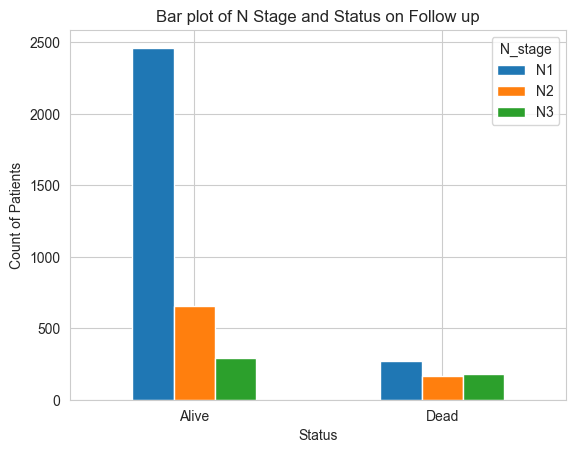

In [128]:
# Compare the N_ Stage at diagnosis and Status of the patient on follow up
N_stage_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['N_stage'])
print(N_stage_status_ctab)
barplot = N_stage_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of N Stage and Status on Follow up')
plt.xlabel('Status')
plt.ylabel('Count of Patients')

In [140]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010.Status,breast_cancer_data_2006_2010.N_stage, normalize='index')

N_stage        N1        N2        N3
Status                               
Alive    0.722418  0.192195  0.085387
Dead     0.438312  0.267857  0.293831

6th_stage   IIA  IIB  IIIA  IIIB  IIIC
Status                                
Alive      1209  995   866    47   291
Dead         96  135   184    20   181


Text(0.5, 0, 'Status')

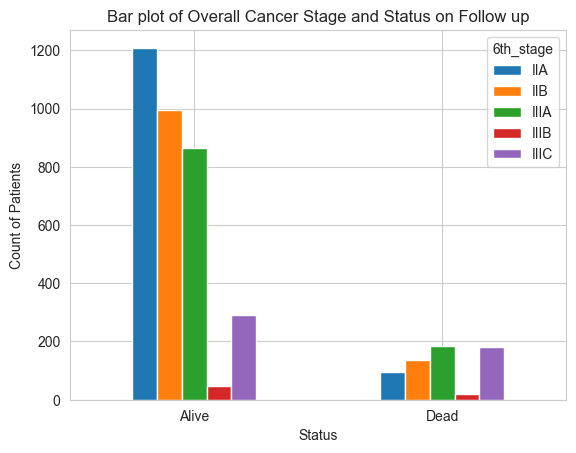

In [146]:
# Compare the N_ Stage at diagnosis and Status of the patient on follow up
sixth_stage_status_ctab = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['6th_stage'])
print(sixth_stage_status_ctab)
barplot = sixth_stage_status_ctab.plot.bar(rot=0)
plt.title('Bar plot of Overall Cancer Stage and Status on Follow up')
plt.ylabel('Count of Patients')
plt.xlabel('Status')

In [145]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['6th_stage'], normalize= 'index')

6th_stage       IIA       IIB      IIIA      IIIB      IIIC
Status                                                     
Alive      0.354754  0.291960  0.254108  0.013791  0.085387
Dead       0.155844  0.219156  0.298701  0.032468  0.293831

## 2. Analysis of Tumor Characteristics and Status of the patient on follow up

Grade   Moderately differentiated; Grade II  Poorly differentiated; Grade III  \
Status                                                                          
Alive                                  2046                               848   
Dead                                    305                               263   

Grade   Undifferentiated; anaplastic; Grade IV  Well differentiated; Grade I  
Status                                                                        
Alive                                       10                           504  
Dead                                         9                            39  


Text(0.5, 0, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

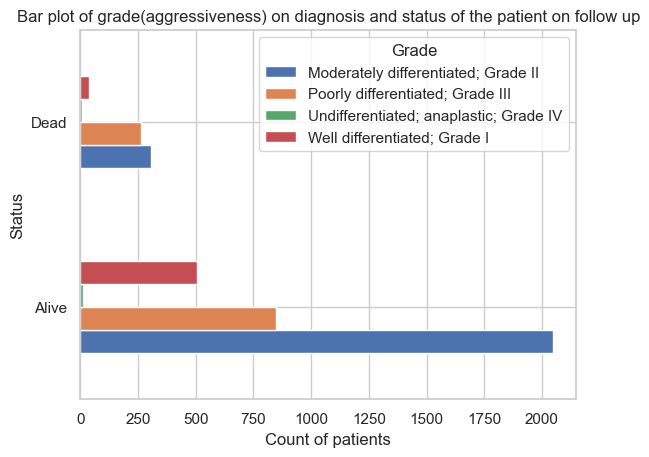

In [311]:
grade_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Grade'])
print(grade_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = grade_versus_status.plot.barh(rot=0)
plt.title('Bar plot of grade(aggressiveness) on diagnosis and status of the patient on follow up')
plt.ylabel('Status')
plt.xlabel('Count of patients')

In [147]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Grade'], normalize= 'index')

Grade   Moderately differentiated; Grade II  Poorly differentiated; Grade III  \
Status                                                                          
Alive                              0.600352                          0.248826   
Dead                               0.495130                          0.426948   

Grade   Undifferentiated; anaplastic; Grade IV  Well differentiated; Grade I  
Status                                                                        
Alive                                 0.002934                      0.147887  
Dead                                  0.014610                      0.063312

A_stage  Distant  Regional
Status                    
Alive         57      3351
Dead          35       581


Text(0.5, 0, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

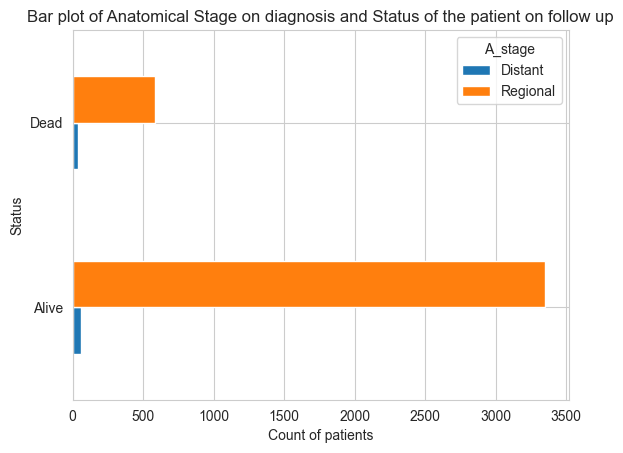

In [149]:
A_stage_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['A_stage'])
print(A_stage_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = A_stage_versus_status.plot.barh(rot=0)
plt.title('Bar plot of Anatomical Stage on diagnosis and Status of the patient on follow up')
plt.ylabel('Status')
plt.xlabel('Count of patients')

In [148]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['A_stage'], normalize= 'index')

A_stage   Distant  Regional
Status                     
Alive    0.016725  0.983275
Dead     0.056818  0.943182

## 3. Analysis of Hormonal Status and Status of the patient on follow up

Estrogen Status  Negative  Positive
Status                             
Alive                 161      3247
Dead                  108       508


Text(0, 0.5, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

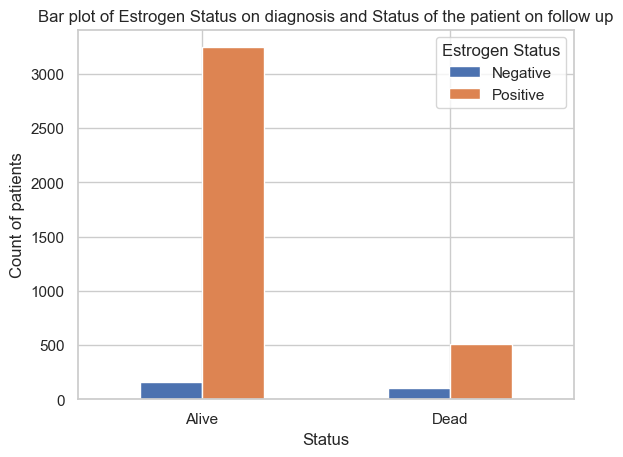

In [314]:
estrogen_versus_status = pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Estrogen Status'])
print(estrogen_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = estrogen_versus_status.plot.bar(rot=0)
plt.title('Bar plot of Estrogen Status on diagnosis and Status of the patient on follow up')
plt.xlabel('Status')
plt.ylabel('Count of patients')

In [150]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Estrogen Status'], normalize= 'index')

Estrogen Status  Negative  Positive
Status                             
Alive            0.047242  0.952758
Dead             0.175325  0.824675

Progesterone Status  Negative  Positive
Status                                 
Alive                     494      2914
Dead                      204       412


Text(0, 0.5, 'Count of patients')

<Figure size 2000x1500 with 0 Axes>

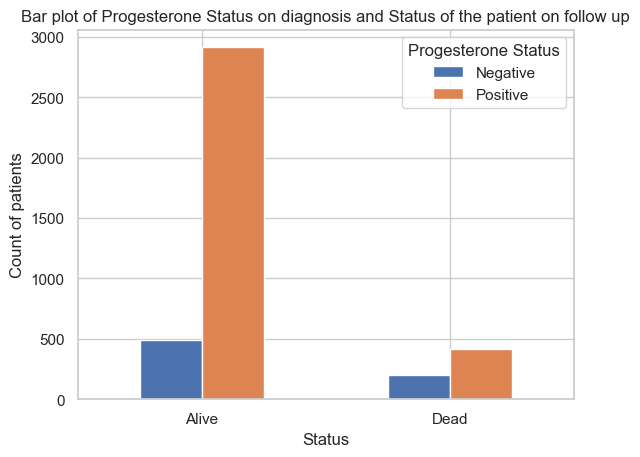

In [317]:
progesterone_versus_status = pd.crosstab( breast_cancer_data_2006_2010['Status'], breast_cancer_data_2006_2010['Progesterone Status'])
print(progesterone_versus_status)
fig = plt.figure(figsize=(20,15))
barplot = progesterone_versus_status.plot.bar(rot=0)
plt.title('Bar plot of Progesterone Status on diagnosis and Status of the patient on follow up')
plt.xlabel('Status')
plt.ylabel('Count of patients')

In [151]:
#create crosstab that displays counts as percentage relative to row totals
pd.crosstab(breast_cancer_data_2006_2010['Status'],breast_cancer_data_2006_2010['Progesterone Status'], normalize= 'index')

Progesterone Status  Negative  Positive
Status                                 
Alive                0.144953  0.855047
Dead                 0.331169  0.668831

# **J. Analysis of Survival in Months and the numerical variables**

Numerical variables: tumour size, number of regional nodes examined, number of positive regional nodes and survival months**

Will involve comparison of numerical variables

## 1. Age versus survival in months

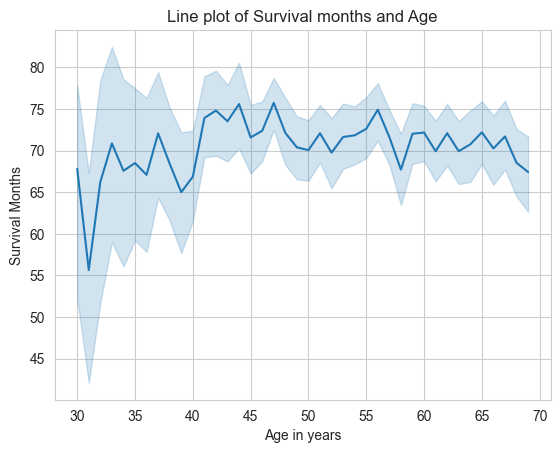

In [117]:
# visualize the data using a lineplot
sns.lineplot(data = breast_cancer_numerical_data, y= 'Survival Months', x= 'Age')
plt.title('Line plot of Survival months and Age')
plt.xlabel('Age in years')
plt.show()

## 2. Analysis of survival in months and Tumor Size,Regional Node Examined,Regional Node Positive, Survival Months

In [96]:
# creation of a dataframe with numerical data from the columns:'Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months'
breast_cancer_numerical_data_2 = breast_cancer_data_2006_2010[['Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months']]
print(breast_cancer_numerical_data_2)

      Tumor Size  Regional Node Examined  Regional Node Positive  \
0             40                      19                      11   
1             45                      25                       9   
2             25                       4                       1   
3             19                      26                       1   
4             35                      21                       5   
...          ...                     ...                     ...   
4019          10                      19                       1   
4020           9                      13                       5   
4021           9                       4                       2   
4022           9                      14                       2   
4023           8                       1                       1   

      Survival Months  
0                   1  
1                   2  
2                   2  
3                   2  
4                   3  
...               ...  
4019           

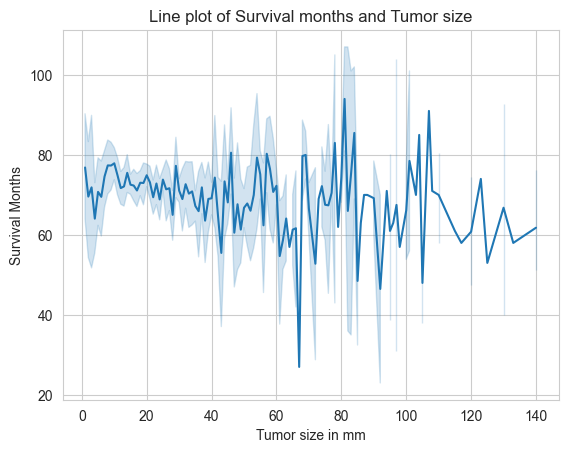

In [133]:
# visualize the data
sns.lineplot(data = breast_cancer_numerical_data_2, y= 'Survival Months', x= 'Tumor Size')
plt.title('Line plot of Survival months and Tumor size')
plt.xlabel('Tumor size in mm')
plt.show()

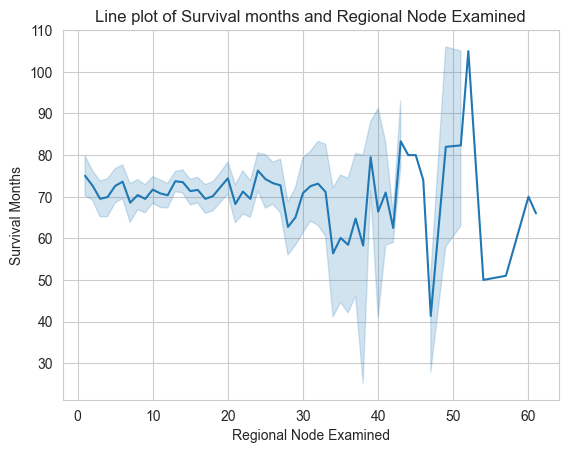

In [125]:
# visualize the data

sns.lineplot(data = breast_cancer_numerical_data_2, y= 'Survival Months', x= 'Regional Node Examined')
plt.title('Line plot of Survival months and Regional Node Examined')
plt.show()

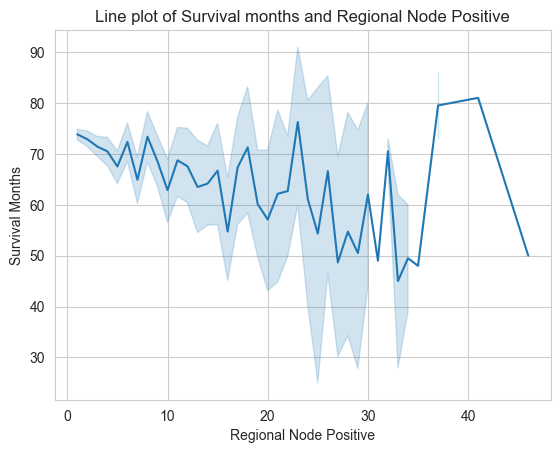

In [127]:
# visualize the data

sns.lineplot(data = breast_cancer_numerical_data_2, y= 'Survival Months', x= 'Regional Node Positive')
plt.title('Line plot of Survival months and Regional Node Positive')
plt.show()

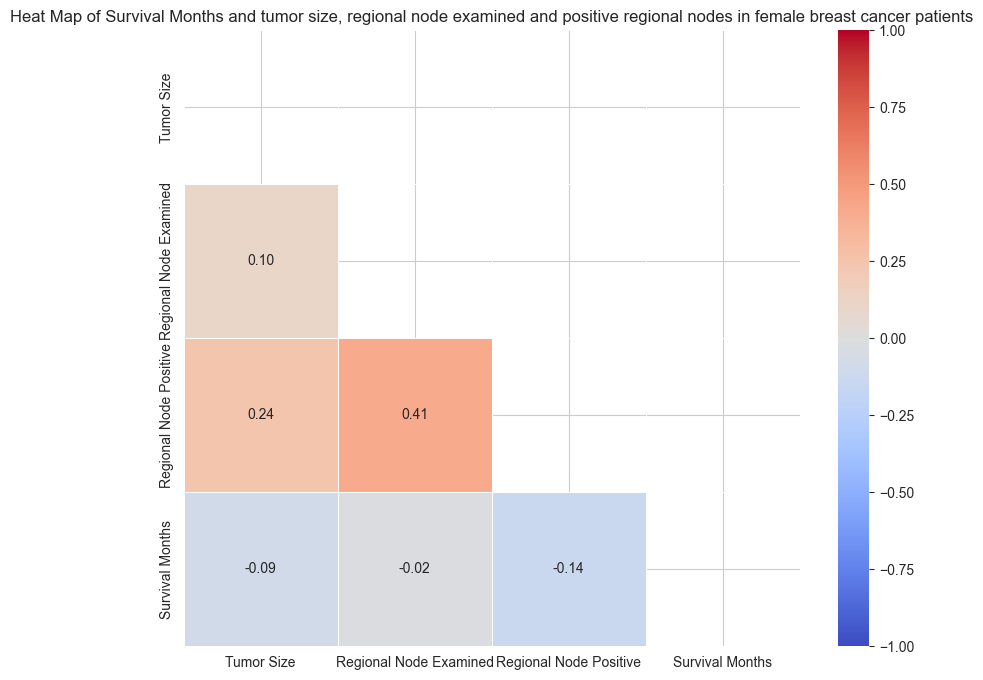

In [98]:
# Calculate the correlation matrix
correlation_matrix = breast_cancer_numerical_data_2.corr()

# Create a mask using numpy's triu function
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap
plt.figure(figsize = (10,8))
# The color map 'coolwarm' is used to differentiate high, low, and medium correlations.
sns.heatmap(correlation_matrix, cmap = 'coolwarm', vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5, mask = mask)
plt.title('Heat Map of Survival Months and tumor size, regional node examined and positive regional nodes in female breast cancer patients')
plt.show()

# **K. Analysis of status on follow up and the numerical variables**

## 1. Status versus Tumor Size

In [431]:
breast_cancer_data_2006_2010.groupby('Status')['Tumor Size'].describe()

count       mean        std  min   25%   50%   75%    max
Status                                                            
Alive   3408.0  29.268779  20.303175  1.0  15.0  23.0  35.0  140.0
Dead     616.0  37.139610  24.116115  1.0  20.0  30.0  50.0  140.0

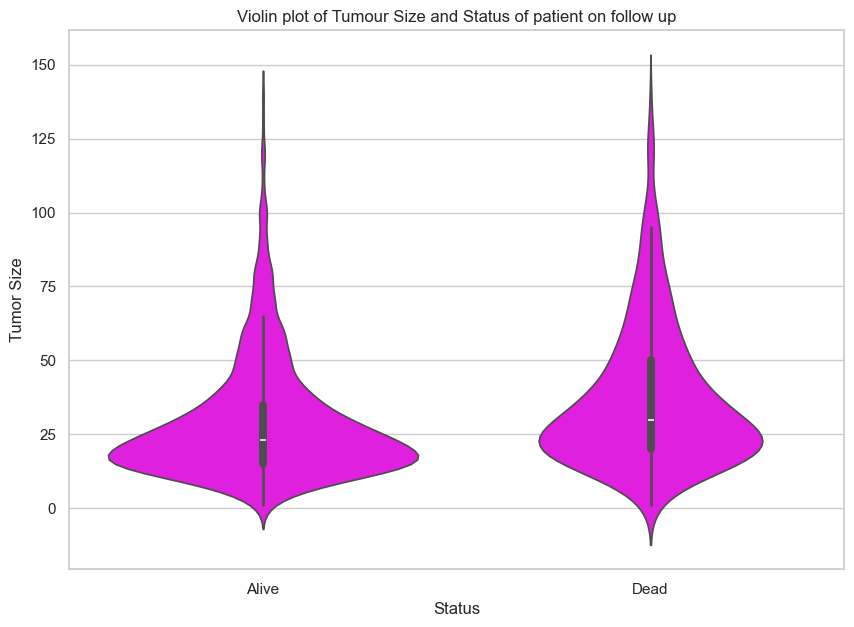

In [322]:
# Visualization of comparison of race and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Tumor Size',
    color= 'Magenta')
plt.title('Violin plot of Tumour Size and Status of patient on follow up')
plt.show()

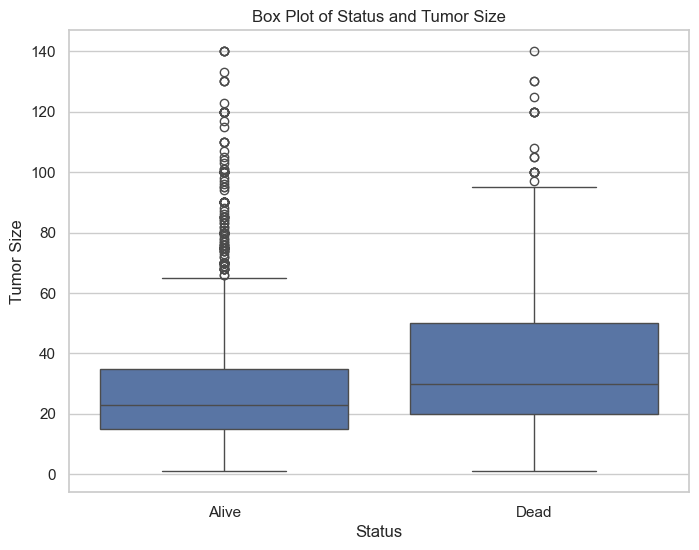

In [319]:
# visualisation of a boxplot using seaborn for comparison of tumor size and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Tumor Size',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Tumor Size')
ax.set_title('Box Plot of Status and Tumor Size')
plt.show()

## 2. Status versus Regional Node Examined

In [321]:
breast_cancer_data_2006_2010.groupby('Status')['Regional Node Examined'].describe()

count       mean       std  min  25%   50%   75%   max
Status                                                         
Alive   3408.0  14.237383  8.023208  1.0  9.0  14.0  19.0  61.0
Dead     616.0  15.019481  8.486600  1.0  9.0  14.0  20.0  57.0

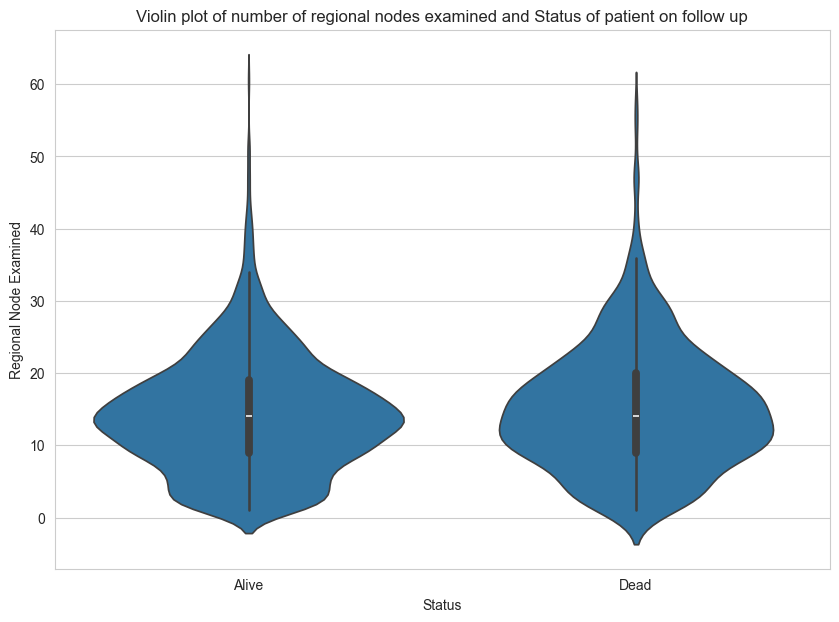

In [452]:
# Visualization of comparison of number of regional nodes examined and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Regional Node Examined')
plt.title('Violin plot of number of regional nodes examined and Status of patient on follow up')
plt.show()

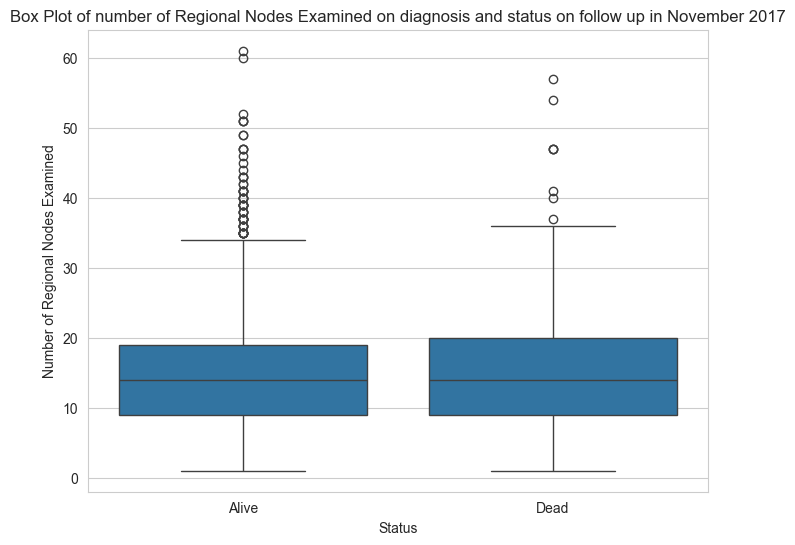

In [450]:
# visualisation of a boxplot using seaborn for comparison of number of regional nodes examined on daignosis and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Regional Node Examined',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Number of Regional Nodes Examined')
ax.set_title('Box Plot of number of Regional Nodes Examined on diagnosis and status on follow up in November 2017')
plt.show()

## 3. Status on follow up versus number of positive regional nodes on diagnosis

In [451]:
breast_cancer_data_2006_2010.groupby('Status')['Regional Node Positive'].describe()

count      mean       std  min  25%  50%   75%   max
Status                                                       
Alive   3408.0  3.600646  4.375180  1.0  1.0  2.0   4.0  41.0
Dead     616.0  7.241883  7.312642  1.0  2.0  4.0  10.0  46.0

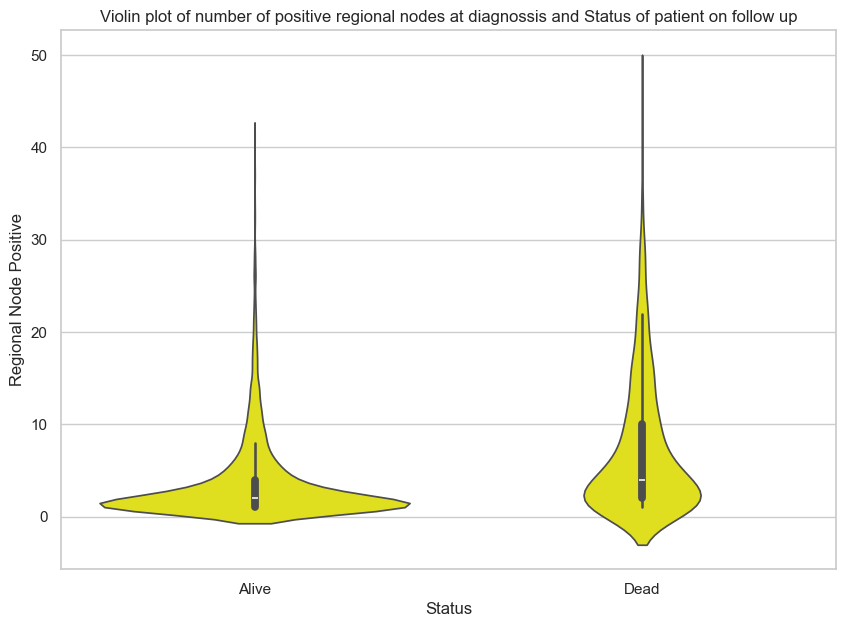

In [323]:
# Visualization of comparison of race and survival in months
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Regional Node Positive',
    color = 'Yellow')
plt.title('Violin plot of number of positive regional nodes at diagnossis and Status of patient on follow up')
plt.show()

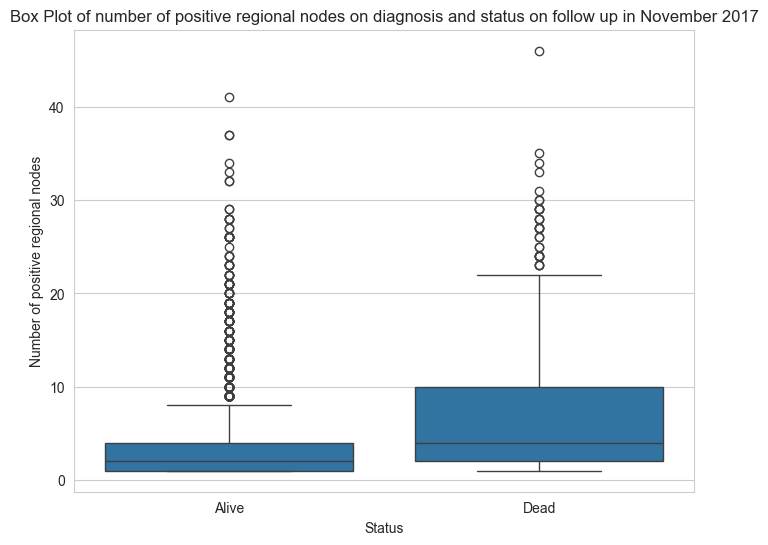

In [456]:
# visualisation of a boxplot using seaborn for comparison of number of regional nodes examined on daignosis and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Regional Node Positive',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Number of positive regional nodes')
ax.set_title('Box Plot of number of positive regional nodes on diagnosis and status on follow up in November 2017')
plt.show()

## 4. Status on follow up and survival months

In [458]:
breast_cancer_data_2006_2010.groupby('Status')['Survival Months'].describe()

count       mean        std  min   25%   50%   75%    max
Status                                                            
Alive   3408.0  75.941021  19.386459  1.0  61.0  77.0  92.0  107.0
Dead     616.0  45.610390  23.966253  2.0  27.0  44.0  61.0  102.0

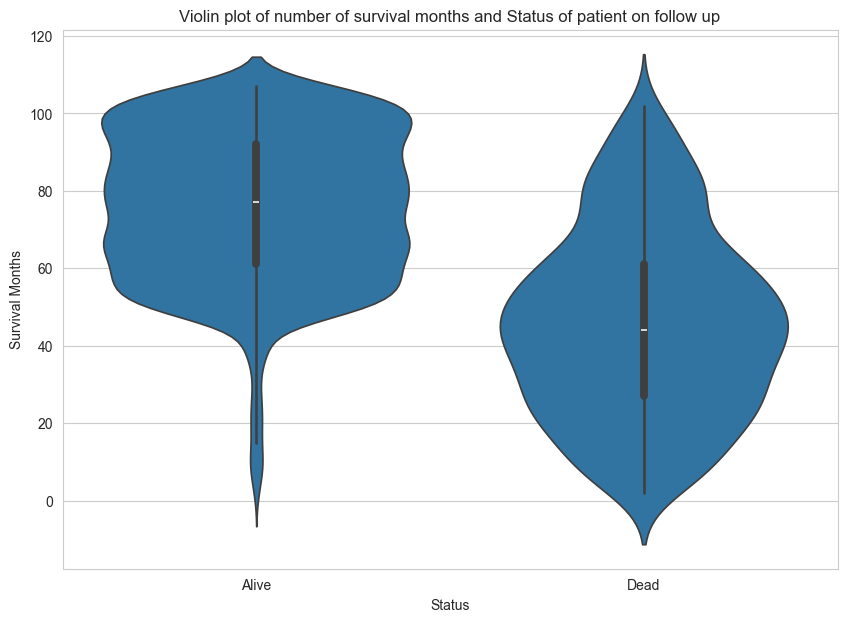

In [459]:
# Visualization of comparison of survival months and status on follow up
plt.figure(figsize=(10,7))
sns.violinplot(
    data= breast_cancer_data_2006_2010,
    x='Status', 
    y='Survival Months')
plt.title('Violin plot of number of survival months and Status of patient on follow up')
plt.show()

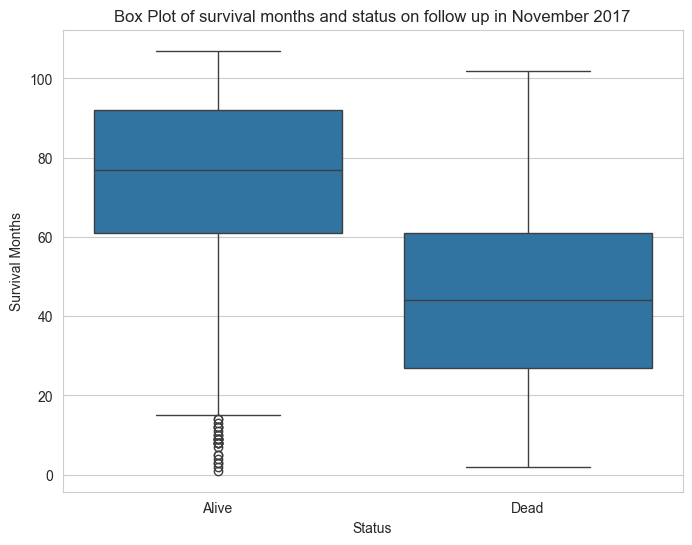

In [460]:
# visualisation of a boxplot using seaborn for comparison of number of regional nodes examined on daignosis and status on follow up
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x =  'Status',
    y =  'Survival Months',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status')
ax.set_ylabel('Survival Months')
ax.set_title('Box Plot of survival months and status on follow up in November 2017')
plt.show()

## **4. Status of the patient on follow up and age**

In [118]:
breast_cancer_data_2006_2010.groupby('Status')['Age'].describe()

count       mean       std   min   25%   50%   75%   max
Status                                                           
Alive   3408.0  53.759096  8.808420  30.0  47.0  54.0  61.0  69.0
Dead     616.0  55.150974  9.698291  30.0  48.0  56.5  63.0  69.0

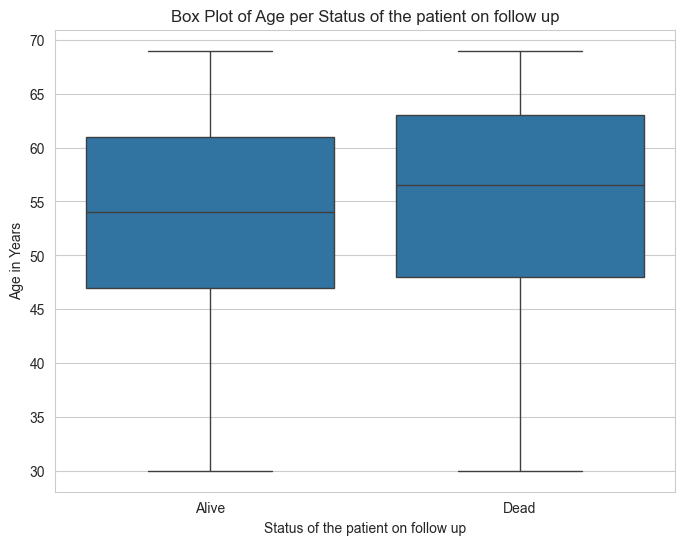

In [119]:
# visualisation of a boxplot using seaborn for comparison of age and progesterone status of the tumour
sns.set_style('whitegrid') 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(
    ax = ax,
    x = 'Status',
    y =  'Age',
    data = breast_cancer_data_2006_2010,
    width=0.8)
ax.set_xlabel('Status of the patient on follow up')
ax.set_ylabel('Age in Years')
ax.set_title('Box Plot of Age per Status of the patient on follow up')
plt.show()

# L. PAIR PLOT OF ALL NUMERICAL VARIABLE PLOTS IN THE DATASET

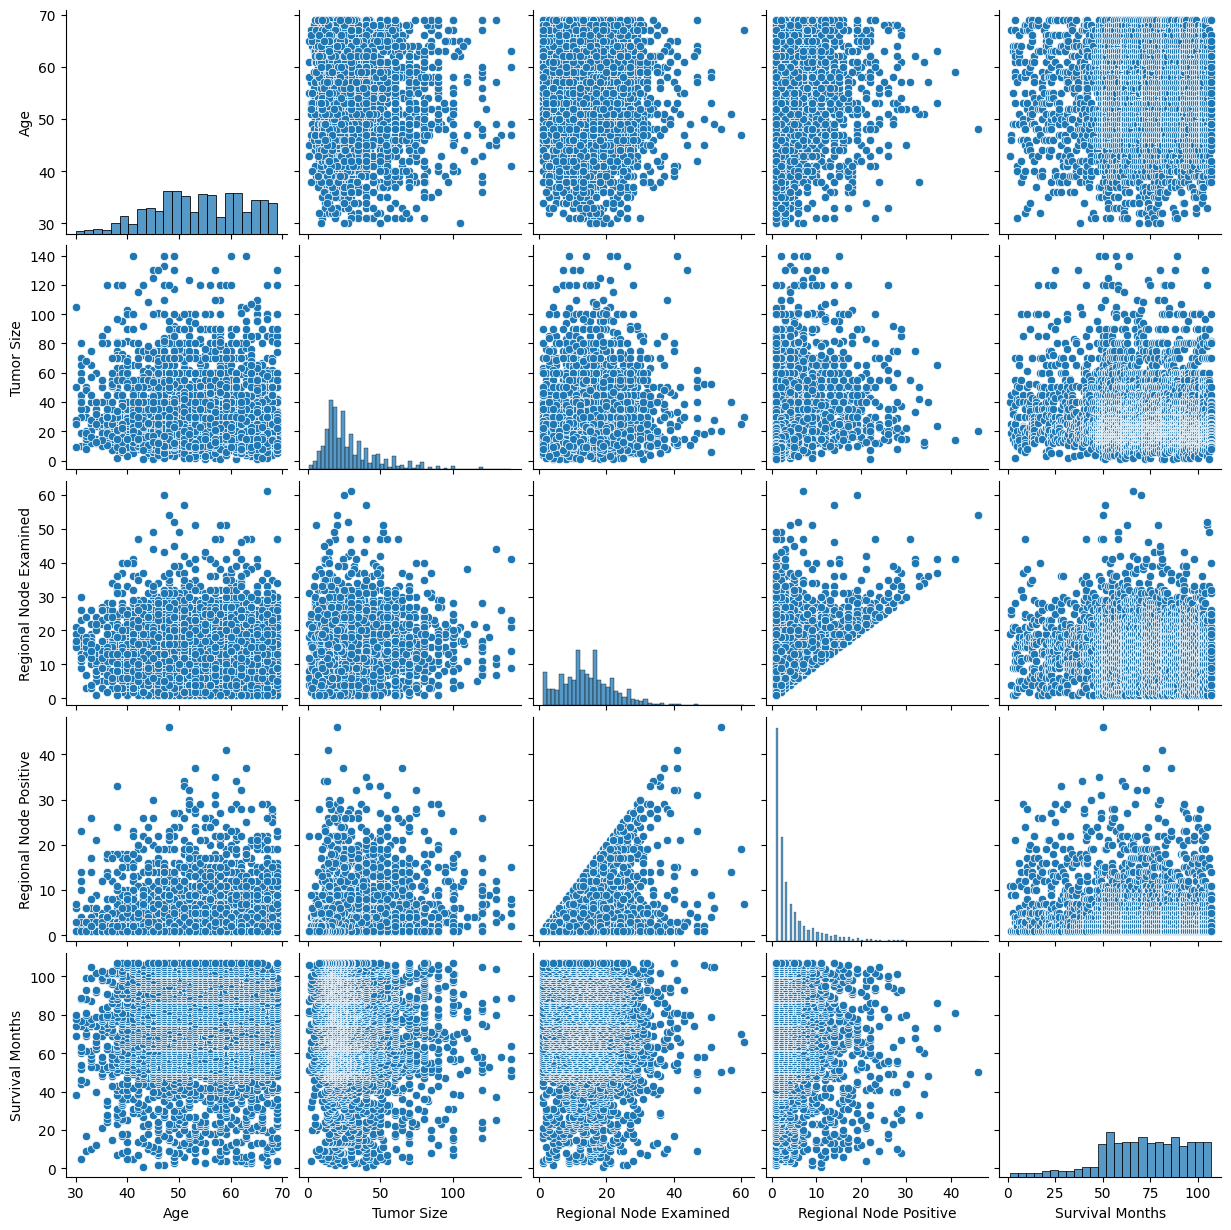

In [103]:
# visualization of the distribution and comparisons between the numerical variables
sns.pairplot(breast_cancer_data_2006_2010)